<a href="https://colab.research.google.com/github/Lcocks/DS050-DeepLearning/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1 (10 pts):

From Maximum Likelihood to Cross-Entropy Loss
Learning Objectives: Connect probability theory to loss functions, understand why cross-entropy emerges naturally.

Part A: Binary Classification Loss Derivation

1. Setup: We have $n$ data points $\{ (x_i, y_i) \}_{i=1}^n$ where $x_i \in \mathbb{R}^d$ and $y_i \in \{ 0, 1 \}$. Assume your model outputs the probability of class 1 as $p_i = p(y_i = 1 \mid x_i) = \sigma(w^T x_i + b)$ where $w \in \mathbb{R}^d$, $b \in \mathbb{R}$, and $\sigma(z)$ is the sigmoid function $\sigma(z) = 1 / (1 + e^{-z})$.
2. Derive from MLE:
    * Write the likelihood function for the dataset
    * Take the log-likelihood
    * Show that maximizing log-likelihood = minimizing binary cross-entropy
    * Bonus (5 pts): Derive the gradient and show it has the nice form: $\nabla_w = X^T(p - y)$

Part B: Extension to Multi-class

1. Softmax derivation: Extend to $K$ classes using softmax function
2. Implementation: Code both binary and multi-class cross-entropy from scratch
3. Verification: Compare your implementation with sklearn.linear_model.LogisticRegression

================================================================================\
Let's derive the binary cross-entropy loss from the principle of Maximum Likelihood Estimation (MLE).

Given $n$ data points $\{ (x_i, y_i) \}_{i=1}^n$ where $x_i \in \mathbb{R}^d$ and $y_i \in \{ 0, 1 \}$, and our model outputs the probability of class 1 as $p_i = p(y_i = 1 \mid x_i) = \sigma(w^T x_i + b)$.

Since $y_i$ is a binary variable, the probability of observing $y_i$ given $x_i$ can be written as:
$p(y_i \mid x_i) = p_i^{y_i} (1 - p_i)^{1 - y_i}$

This is because if $y_i = 1$, the probability is $p_i^1 (1 - p_i)^0 = p_i$. If $y_i = 0$, the probability is $p_i^0 (1 - p_i)^1 = 1 - p_i$.

Assuming the data points are independent and identically distributed (i.i.d.), the likelihood function for the entire dataset is the product of the individual probabilities:
$$ L(w, b) = \prod_{i=1}^n p(y_i \mid x_i) = \prod_{i=1}^n p_i^{y_i} (1 - p_i)^{1 - y_i} $$

To simplify calculations, we typically work with the log-likelihood function, which is the natural logarithm of the likelihood function. Maximizing the log-likelihood is equivalent to maximizing the likelihood because the logarithm is a monotonically increasing function.
$$ \log L(w, b) = \log \left( \prod_{i=1}^n p_i^{y_i} (1 - p_i)^{1 - y_i} \right) $$
Using the property of logarithms ($\log(ab) = \log a + \log b$), we can convert the product into a sum:
$$ \log L(w, b) = \sum_{i=1}^n \log \left( p_i^{y_i} (1 - p_i)^{1 - y_i} \right) $$
Using another property of logarithms ($\log(a^b) = b \log a$), we get:
$$ \log L(w, b) = \sum_{i=1}^n \left( y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right) $$

Our goal is to maximize the log-likelihood function with respect to the parameters $w$ and $b$.
$$ \max_{w, b} \sum_{i=1}^n \left( y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right) $$

Minimizing a function is equivalent to maximizing the negative of that function. So, maximizing the log-likelihood is equivalent to minimizing the negative log-likelihood:
$$ \min_{w, b} - \sum_{i=1}^n \left( y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right) $$
This expression is the **binary cross-entropy loss** for the entire dataset. For a single data point, the binary cross-entropy loss is:
$$ \mathcal{L}_{BCE}(y_i, p_i) = - \left( y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right) $$

Thus, maximizing the log-likelihood of the data under our probabilistic model is equivalent to minimizing the binary cross-entropy loss between the true labels $y_i$ and the predicted probabilities $p_i$. This shows why binary cross-entropy is a natural choice for the loss function in binary classification problems when using models that output probabilities.

**Bonus: Gradient Derivation**

Let's derive the gradient of the negative log-likelihood (binary cross-entropy loss) with respect to $w$. The loss for a single data point is $\mathcal{L}_i = - [y_i \log(p_i) + (1 - y_i) \log(1 - p_i)]$. We know that $p_i = \sigma(z_i)$ where $z_i = w^T x_i + b$.

Using the chain rule, $\frac{\partial \mathcal{L}_i}{\partial w} = \frac{\partial \mathcal{L}_i}{\partial p_i} \frac{\partial p_i}{\partial z_i} \frac{\partial z_i}{\partial w}$.

1. $\frac{\partial \mathcal{L}_i}{\partial p_i}$:
   $$ \frac{\partial}{\partial p_i} [-y_i \log(p_i) - (1 - y_i) \log(1 - p_i)] = -y_i \frac{1}{p_i} - (1 - y_i) \frac{1}{1 - p_i} (-1) = -\frac{y_i}{p_i} + \frac{1 - y_i}{1 - p_i} = \frac{-y_i(1 - p_i) + p_i(1 - y_i)}{p_i(1 - p_i)} = \frac{-y_i + y_i p_i + p_i - p_i y_i}{p_i(1 - p_i)} = \frac{p_i - y_i}{p_i(1 - p_i)} $$

2. $\frac{\partial p_i}{\partial z_i}$: The derivative of the sigmoid function is $\frac{d\sigma}{dz} = \sigma(z)(1 - \sigma(z))$. So, $\frac{\partial p_i}{\partial z_i} = p_i(1 - p_i)$.

3. $\frac{\partial z_i}{\partial w}$: $z_i = w^T x_i + b$. The gradient with respect to $w$ is $x_i$. So, $\frac{\partial z_i}{\partial w} = x_i$.

Now, combining these parts:
$$ \frac{\partial \mathcal{L}_i}{\partial w} = \left( \frac{p_i - y_i}{p_i(1 - p_i)} \right) \left( p_i(1 - p_i) \right) (x_i) = (p_i - y_i) x_i $$

This is the gradient for a single data point. For the entire dataset, the total loss is the sum of individual losses $\mathcal{L} = \sum_{i=1}^n \mathcal{L}_i$. The gradient of the total loss is the sum of the individual gradients:
$$ \nabla_w \mathcal{L} = \sum_{i=1}^n (p_i - y_i) x_i $$
If we represent $X$ as the design matrix where each row is $x_i^T$, $p$ as the vector of predicted probabilities $[p_1, p_2, ..., p_n]^T$, and $y$ as the vector of true labels $[y_1, y_2, ..., y_n]^T$, this sum can be written in matrix form:
$$ \nabla_w \mathcal{L} = X^T (p - y) $$
This elegant form shows that the gradient is proportional to the transpose of the input features multiplied by the difference between the predicted probabilities and the true labels. This form is computationally efficient and intuitive, driving the weights in a direction that reduces the error $(p_i - y_i)$.

In [1]:
import math
import random
import numpy as np
import pandas as pd
import torch
from typing import Tuple, List, Generator
import matplotlib.pyplot as plt
import time

torch.manual_seed(123)

Part B:

2. Code both binary and multi-class cross-entropy from scratch

In [2]:
# Binary Cross-Entropy Loss Function ##

#np.random.seed(123)  # For reproducible results during lecture
n_points, n_features = 100, 3 
X = np.random.randn(n_points, n_features)
w = np.random.randn(n_features) # weights
b = 0.5
y = np.random.randint(0, 2, n_points)  # Binary labels
    

## noise_level is my b
def binary_cross_entropy(w, X, b, y):
    """
    Binary Cross-Entropy loss function
    """
    L = 0
    
    for i in range(len(X)):
        z_i = np.dot(w.T, X[i]) + b #for calculating logit to put in sigmoid, this is for the model p_i = σ(np.dot(w.T, X[i]) + b) 
        
        p_i = 1 / (1 + np.exp(-z_i)) #for the sigmopid function of σ(z) = 1 / (1 + e^-z)
                   
        L += (y[i] * math.log(p_i) + (1 - y[i]) * math.log(1 - p_i)) #calculating the binary-cross-entropy of each sample and summating across all rows of X.
    
    L_BCE = -L #returning negative total loss for minimization
    return L_BCE

## Testing ##
BCEloss1 = binary_cross_entropy(w, X, b, y)
print(f"Binary-Cross-Entropy loss: {BCEloss1:.6f}")

Binary-Cross-Entropy loss: 84.970870


In [3]:
## Multi-class Cross-Entropy Loss Function ##

np.random.seed(123)  # For reproducible results during lecture
n_points, n_features, K = 100, 4, 4
X = np.random.randn(n_points, n_features) # data point matrix
W = np.random.randn(n_features, K) # weights as matrix
b = np.random.randn(K) # scalar of noise_levels 
y = np.random.randint(0, K, n_points) # 1D array of labels with that can be either 0 to K  


def cross_entropy(W, X, b, y, K):
    """
    Multi-class Cross-Entropy loss function
    
    Args:
        W: weight matrix (shape: features, num_classes)
        K: int number of classes
        X: input data (shape: n_points, features)
        b: bias vector (shape: num_classes,)
        y: true labels - can be:
            - One-hot encoded (shape: n_points, num_classes)
            - Class indices (shape: n_points,) 
                
    Test 1 ###  Currently testing class indices!!! Failed! cannot use L += y[i, k] * math.log(p_i[k])  ###
    Test 2 ###  Testing one-hot encoding.
    
    Returns:
        L: Multi-class cross-entropy loss (scalar)
    """
    L = 0
    y_one_hot = np.zeros((n_points, K)) # setting up the framework 
    y_one_hot[np.arange(n_points), y] = 1 # inputting the 1's for each placement of the index provided given the current value of y.

    
    for i in range(len(X)):

        z_i = np.dot(X[i], W) + b # for calculating logit for every class with shape (K,_)
        
        exp_z = np.exp(z_i) # start applying softmax function
        
        p_i = exp_z / np.sum(exp_z)  # shape (K,_) 
        
        for k in range(K):
            
            L += y_one_hot[i, k] * math.log(p_i[k]) # calculating the cross-entropy of each sample of each class. So grabbed all the classes k for each i and calc'd loss.

    L = -L #returning negative total loss for minimization
    return L


## Testing ##
cross_loss1 = cross_entropy(W, X, b, y, K)
print(f"Multi-Class Cross-Entropy loss: {cross_loss1:.6f}")

Multi-Class Cross-Entropy loss: 286.419729


Part B:

3. Verification: Compare your implementation with sklearn.linear_model.LogisticRegression

In [4]:
from sklearn import linear_model, datasets

logreg_model = linear_model.LogisticRegression(C=1e6, random_state=123) # building the model
logreg_model.fit(X, y) # making a model fit


# Extract learned weights and bias
W_sklearn = logreg_model.coef_.T  # sklearn coef is (n_classes, n_features), we need (n_features, n_classes)
b_sklearn = logreg_model.intercept_  # bias terms
print(f"Sklearn weights: {W_sklearn}")
print(f"Sklearn bias: {b_sklearn}")

scratch_cross_entropy_loss = cross_entropy(W_sklearn, X, b_sklearn, y, K)
print(f"\nOur cross-entropy loss from the linear model: {scratch_cross_entropy_loss}")

logits = logreg_model.decision_function(X) # getting logits from sklearn



Sklearn weights: [[ 0.21661035  0.0414862   0.01722476 -0.27532131]
 [-0.20309598 -0.0087771   0.17750731  0.03436578]
 [ 0.18307943 -0.34736288  0.07182578  0.09245767]
 [ 0.18000169  0.061904   -0.25958034  0.01767464]]
Sklearn bias: [-0.08708353  0.11206366 -0.25938927  0.23440914]

Our cross-entropy loss from the linear model: 131.60434898543508


# Problem 2 (10 pts): Normal Equations vs. Gradient Descent - A Computational Study
Learning Objectives: Understand trade-offs between analytical and iterative solutions.

Analysis Tasks:

1. Complexity Analysis: Plot runtime vs. feature dimension (10 to 1000 features)
2. Accuracy Comparison: How close are the solutions? Plot error vs. iterations for GD
3. Memory Usage: When does the normal equation become impractical?
4. Conditioning: What happens when $X^TX$ is nearly singular? Add ridge regularization.
5. Report: When would you choose each method in practice?

In [5]:
##  Starting by creating the class, method, and functions for linear regression with some number of features to be run and plotted  ##

    
# Generate synthetic regression data - from video https://www.youtube.com/watch?v=WOFb8EKAy7I&t=1s
def generate_synthetic_data(
    weights: torch.tensor,
    bias: float,
    num_samples: int,
    noise_std: float = 0.01
    ) -> Tuple[torch.Tensor, torch.Tensor]: #This -> means returns and the type that should be returned.

    """
    Model: y = X @ w + b + ε, with ε ~ N(Θ, noise_std^2)
    Args:
        weights: (d,_) true weight vector
        bias: scaler true intercept
        num_samples: number of samples n
        noise_std: standard deviation of additive Gaussian noise

    Returns:
        X: (n, d) feature matrix
        y: (n, 1) target vector
    """

    d = weights.shape[0]
    X = torch.randn(num_samples, d)
    noise = torch.randn(num_samples, 1) * noise_std
    y = X @ weights.view(-1, 1) + bias + noise
    return X, y
    

class LinearRegressionScratch:
    # Linear regression "neural network" with parameters θ = (w, b),
    # trained by vanilla gradient descent with manually derived gradients.

    # Model:
    # y_hat = X @ w + b

    # Loss (MSE):
    # L = (1/n) * Σ_i (y_hat_i - y_i)^2

    # Gradients:
    # ∂L/∂w = (2/n) * X^T (y_hat - y)
    # ∂L/∂b = (2/n) * Σ_i (y_hat_i - y_i)

    def __init__(self, input_size: int, learning_rate: float = 0.01):
        
        self.w = torch.randn(input_size, 1) * 0.01
        self.b = torch.randn(1)
        self.lr = learning_rate
        self.input_size = input_size

        # No autograd - we will compute gradients manually
        self.w.requires_grad = False
        self.b.requires_grad = False
    
    def forward(self, X: torch.Tensor) -> torch.Tensor:
        """
        Computes predictions: y_hat = X @ w + b
        """
        return X @ self.w + self.b
    
    def mse_loss(self, y_hat: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
        """
        Computes the Mean Squared Error (MSE) loss.
        """
        return ((y_hat - y)**2).mean()
    
    ##  Added this to use X, y and still get mse from global  ## 
    def compute_mse_loss(self, X, y):
        y_pred = self.forward(X)  # Calculate prediction
        return torch.mean((y_pred - y)**2)    # Return loss directly

    def compute_gradients(self, X: torch.Tensor, y_hat: torch.Tensor, y: torch.Tensor) -> Tuple[torch.Tensor, torch]:
        """
        Compute gradients of loss with respect to parameters w and b
        Derive ∂L/∂w and ∂L/∂b by calculus.

        With L = (1/n) Σ (y_hat - y)^2, the derivatives are:
        ∂L/∂w = (2/n) X^T (y_hat - y)
        ∂L/∂b = (2/n) Σ (y_hat - y)
        """
        n = X.shape[0]
        error = y_hat - y
        dw = (2.0/n) * X.T @ error
        db = (2.0/n) * error.sum() # gradient of bias is basically average error, so moving the bias to 0
        return dw, db   
    
    def step(self, X: torch.Tensor, y: torch.Tensor) -> float:
        """
        One gradient descent update:
            1) forward
            2) loss
            3) gradients (manual)
            4) parameter update
        """
        # 1 forward
        y_hat = self.forward(X)
        # 2 loss
        loss = self.mse_loss(y_hat, y)
        # 3 gradients
        dw, db = self.compute_gradients(X, y_hat, y)
        # update
        self.w -= self.lr * dw
        self.b -= self.lr * db
        return loss.item()
    pass

    

from collections.abc import Iterator
##  Mini-batching & Training Loop  ##
def create_mini_batches(
    X: torch.Tensor,
    y: torch.Tensor,
    batch_size: int = 32,
    shuffle: bool = True
) -> Iterator[Tuple[torch.Tensor, torch.Tensor]]:
    n = X.shape[0]
    if shuffle:
        idx = torch.randperm(n)
    else:
        idx = torch.arange(n)
    for start in range(0, n, batch_size):
        end = min(start + batch_size, n)
        b = idx[start:end]
        yield X[b], y[b]

        

from re import X
##  Training the model  ##
def train_model(
    model: LinearRegressionScratch,
    X: torch.Tensor,
    y: torch.Tensor,
    num_epochs: int = 50,
    batch_size: int = 32,
    verbose: bool = True
) -> List[float]:
    """
    Basic mini batch GD training loop.
    We report avg loss per epoch.
    """
    """
    The bug was in your train_model() function:

    total_loss was accumulating across ALL epochs
    But you were dividing by batches in current epoch only
    This made the "average" loss appear to grow over time
        >for X_batch, y_batch in create_mini_batches(X, y, batch_size):
                loss = model.step(X_batch, y_batch)
                total_loss += loss
                num_batches += 1
                ...<
    
    ...
    if verbose:
            print("/n==== Training Model ====")
    total_loss = 0.0
    epoch_avgs: List[float] = []
    for epoch in range(num_epochs):
        num_batches = 0.0
        epoch_loss = 0.0 # Reset for each epoch
        for X_batch, y_batch in create_mini_batches(X, y, batch_size):
            loss = model.step(X_batch, y_batch)
            total_loss += loss
            num_batches += 1
        epoch_loss = total_loss / max(num_batches, 1)
        epoch_avgs.append(epoch_loss)
        if verbose:
            w, b = model.w, model.b
            print(f"Epoch {epoch+1}/{num_epochs} | Loss: {epoch_loss:.4f} | w={[f'{wi:.3f}' for wi in w]} | b = {b: .3f}")
    return epoch_avgs
    """
    """
    Now trying updated train_model

    """
    if verbose:
            print("/n==== Training Model ====")
    total_loss = 0.0
    epoch_avgs: List[float] = []
    for epoch in range(num_epochs):
        epoch_loss = 0.0  
        num_batches = 0
        
        for X_batch, y_batch in create_mini_batches(X, y, batch_size):
            loss = model.step(X_batch, y_batch)
            epoch_loss += loss  # Accumulate only within current epoch
            num_batches += 1
        
        # Average loss for this epoch
        avg_epoch_loss = epoch_loss / max(num_batches, 1)
        epoch_avgs.append(avg_epoch_loss)
        
        if verbose:
            w, b = model.w, model.b
            print(f"Epoch {epoch+1}/{num_epochs} | Loss: {avg_epoch_loss:.4f} | w={[f'{wi:.3f}' for wi in w.flatten()]} | b = {b.item():.3f}")
    
    return epoch_avgs



In [6]:
##  Testing of function  ##
def testing_ana_vs_norm(n_points, n_features, noise_std):
    
    torch.manual_seed(123) # setting manual seed for every run so we can compare just the feature change.
    
    N = n_points
    TRUE_W = torch.rand(n_features).reshape(-1, 1) # here we have 2 dimensions
    TRUE_B = float(torch.rand(1) * 5) # float from 0-5


    X, y = generate_synthetic_data(TRUE_W, TRUE_B, N, noise_std)

    
    # 2) Initialize the model
    model = LinearRegressionScratch(input_size=n_features) # Learning rate preset to 0.01

    
    # 3) Train
    losses = train_model(model, X, y, num_epochs=100, verbose=False)
    w_learned, b_learned = model.w, model.b

    
    ##  Analytical solution (Normal Equations)  ##
    start_time1 = time.time()

    # Add bias column to X (augment the matrix)
    ones_column = torch.ones(X.shape[0], 1, dtype=X.dtype, device=X.device)
    X_augmented = torch.cat([X, ones_column], dim=1)
    
    # Normal equations: w = (X^T X)^(-1) X^T y
    XTX = X_augmented.T @ X_augmented # Using @ for matrix multiplication
    XTy = X_augmented.T @ y
    w_analytical = torch.linalg.solve(XTX, XTy)  # More stable than inverse

    w_opt, b_opt = w_analytical[:-1], w_analytical[-1].item() # must drop last value since that value is b so 10x1 length tensor.
    y_pred_analytical = X @ w_opt + b_opt
    analytic_loss_optimal = torch.mean((y - y_pred_analytical) ** 2).item()

    analytical_time = time.time() - start_time1


    ##  Iterative solution (gradient descent)  ##
    start_time2 = time.time()

    w_gd, b_gd, gd_loss = model.w, model.b, model.step(X, y)

    gd_time = time.time() - start_time2
    
    
    return {
        "N": N,
        "TRUE_W": TRUE_W,
        "TRUE_B": TRUE_B,
        "X": X,
        "y": y,
        "w_learned": w_learned,
        "b_learned": b_learned,
        "losses": losses,
        
        "w_opt": w_opt, 
        "b_opt": b_opt,
        "analytic_loss_optimal": analytic_loss_optimal,
        "analytical_time": analytical_time,
        
        "w_gd": w_gd,
        "b_gd": b_gd, 
        "gd_loss": gd_loss,
        "gd_time": gd_time
    }

In [7]:
test1 = testing_ana_vs_norm(100, 10, .01)
test1['analytic_loss_optimal']

0.000102563964901492

In [8]:
test1['gd_loss']

0.00012644813978113234

In [ ]:
def debug_training():
    """Debug function to see what's happening during training"""
    torch.manual_seed(123)
    
    # Simple 2D problem
    TRUE_W = torch.rand(10).reshape(-1, 1)
    TRUE_B = 12.0
    X, y = generate_synthetic_data(TRUE_W, TRUE_B, 100, 0.1)
    
    model = LinearRegressionScratch(input_size=10, learning_rate=0.01)
    
    print("Initial weights:", model.w.flatten())
    print("Initial bias:", model.b.item())
    
    # Calculate initial loss
    initial_loss = model.compute_mse_loss(X, y).item()
    print("Initial loss:", initial_loss)
    
    # Train for a few epochs manually
    for epoch in range(5):
        loss = model.step(X, y)
        print(f"Epoch {epoch+1}: Loss = {loss:.4f}, w = {model.w.flatten()}, b = {model.b.item():.4f}")
    
    return model, X, y

# Run debug
debug_training()

In [10]:
 range(1001)[10:]

range(10, 1001)

In [11]:

torch.manual_seed(123)

def compare_methods(n_points, n_features, noise_level=0.1): # n_features is d, n_points is num_samples = 1000, noise_level is noise
    
    runtimes_ana = []
    runtimes_gd = []
    feature_count = []
    tests = []
    
    for i in (range(n_features)[10:]):
        test_n = testing_ana_vs_norm(n_points, i, noise_level)
        tests.append(test_n)
        runtimes_ana.append(test_n['analytical_time'])
        runtimes_gd.append(test_n['gd_time'])
        feature_count.append(i)
    
    return {
        "runtimes_ana": runtimes_ana,
        "runtimes_gd": runtimes_gd,
        "feature_count": feature_count,
        "tests": tests
    }

    

In [12]:
test_comp = compare_methods(100, 1001, 0.1)

In [13]:
test_comp["runtimes_ana"][:10]

[0.00018453598022460938,
 0.00016069412231445312,
 0.00016164779663085938,
 0.00017881393432617188,
 0.00013399124145507812,
 0.00018358230590820312,
 0.10760807991027832,
 0.0005631446838378906,
 0.0001628398895263672,
 0.00013709068298339844]

In [14]:
test_comp["runtimes_gd"][:10]

[7.271766662597656e-05,
 7.05718994140625e-05,
 7.390975952148438e-05,
 8.153915405273438e-05,
 6.699562072753906e-05,
 6.985664367675781e-05,
 9.965896606445312e-05,
 8.225440979003906e-05,
 6.985664367675781e-05,
 6.937980651855469e-05]

#### 1. Complexity Analysis: Plot runtime vs. feature dimension (10 to 1000 features)


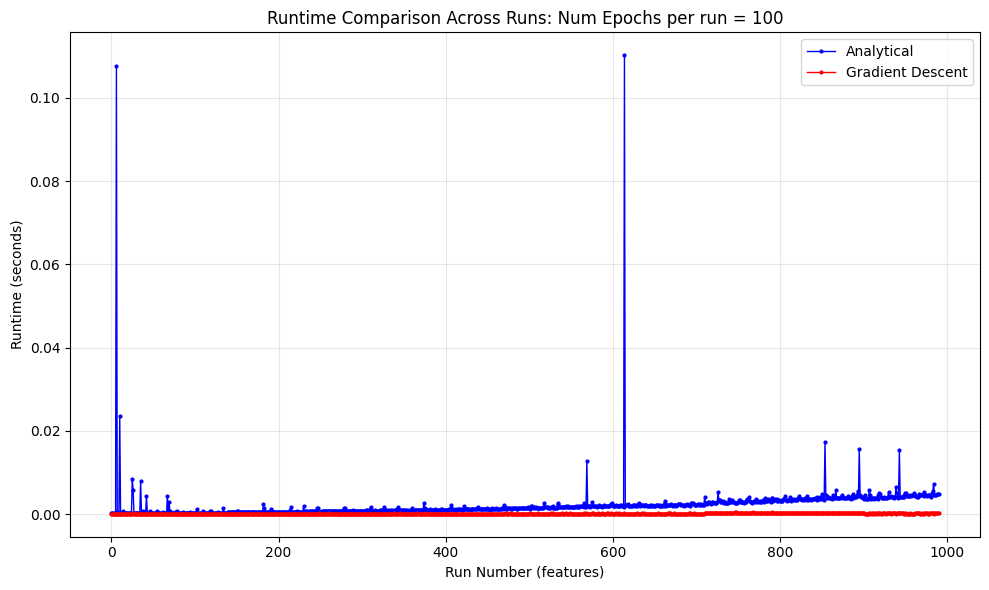

In [15]:
# Alternative: Line plot showing individual runs
plt.figure(figsize=(10, 6))
plt.plot(range(len(test_comp["feature_count"])), test_comp["runtimes_ana"], 'bo-', label='Analytical', linewidth=1, markersize=2)
plt.plot(range(len(test_comp["feature_count"])), test_comp["runtimes_gd"], 'ro-', label='Gradient Descent', linewidth=1, markersize=2)

plt.xlabel('Run Number (features)')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime Comparison Across Runs: Num Epochs per run = 100')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### 2. Accuracy Comparison: How close are the solutions? Plot error vs. iterations for GD

The soltuions are extremely close in pattern as the number of features increases the rate at which the MSE Loss falls increases drastically given the other conditions hold (learning rate, number of points, etc.). Most converge to the closest value around 20 iterations. The higher number of features seem to reach a relative lowest loss sooner at around 10 iterations.

In [16]:
feature_intervals = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
for i, feature_count in enumerate(feature_intervals):
    # Get the test result for this feature count
    #test_data = test_comp["tests"][feature_count]
    #losses = test_data["losses"]
    print(i, feature_count)

0 100
1 200
2 300
3 400
4 500
5 600
6 700
7 800
8 900
9 1000


In [19]:

def plot_gd_error_vs_iterations_multi_features(test_results):
    """
    Plot the gradient descent loss vs iterations (epochs) for multiple feature counts
    Assumes test_results["tests"] is a list where index corresponds to feature count
    """
    # Feature intervals you want to plot (adjust indices based on your data structure)
    feature_intervals = [0, 90, 190, 290, 390, 490, 590, 690, 790, 890, 990]  # Adjust these as needed. # Setup with 10-1000 so the counts goes from 0-990 with 0 as 10 and 990 as 1000
    cmap = plt.cm.Paired

    plt.figure(figsize=(12, 8))
    
    for i, feature_count in enumerate(feature_intervals):
        # Get the test result for this feature count
        test_data = test_results["tests"][feature_count]
        losses = test_data["losses"]
        
        # Plot GD losses over epochs
        epochs = range(1, len(losses) + 1)
        plt.plot(epochs, losses, color=cmap(i/11),
                linewidth=1, label=f'{feature_count} Features')
    
    plt.xlabel('Epoch (Iteration)')
    plt.ylabel('MSE Loss')
    plt.title('Gradient Descent Convergence: Effect of Feature Count')
    plt.legend()
    plt.grid(True, alpha=0.3)
#    plt.yscale('log')  # Log scale to better see convergence
    plt.xlim(1, 40) #get better picture of the corner
    plt.tight_layout()
    plt.show()

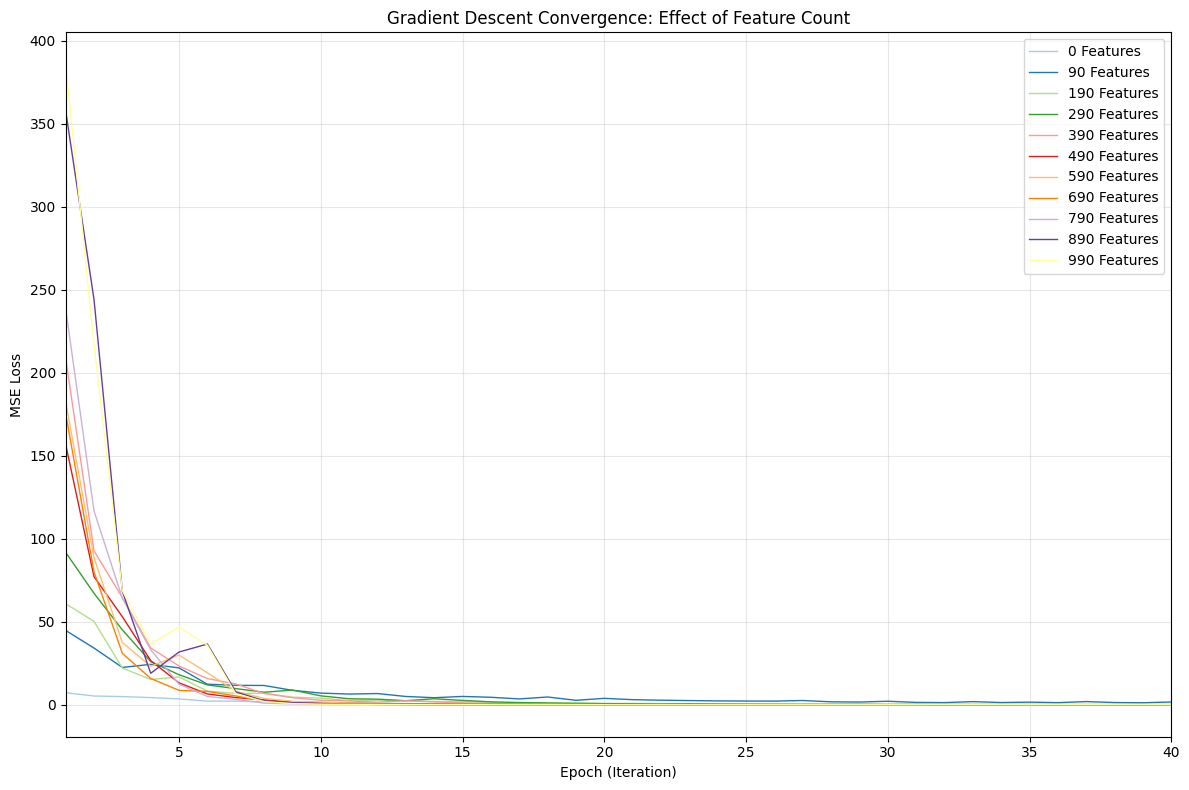

In [20]:
plot_gd_error_vs_iterations_multi_features(test_comp)

#### 3.  Memory Usage: When does the normal equation become impractical?

Given the clear separation in the runtimes I presume anything around 200 runs would be too long as using the Gradient Descent (especially if using a prebuilt function) can handle the same job while saving memory. This also implies the number of points remains 100, since this is unliekly in the real world, say we have a dataset of 100k rows and 10 features, the runtime difference would only grow greater. 

#### 4. Conditioning: What happens when $X^TX$ is nearly singular? Add ridge regularization.

When $X^TX$ is nearly singular in some sitatuations like heavy multi-collinearity, perfect collinearity if features are combinations of others, and high dimensionality. This implies that the matrix cannot be inverted without providing solutions that are meaningless. So we want to constrain and smooth out the matrix. 

In [21]:
##  Testing of function with norm ridge reg  ##
def testing_ana_vs_norm_with_ridgereg(n_points, n_features, noise_std, ridge_lambda):
    
    torch.manual_seed(123) # setting manual seed for every run so we can compare just the feature change.
    
    N = n_points
    TRUE_W = torch.rand(n_features).reshape(-1, 1) # here we have 2 dimensions
    TRUE_B = float(torch.rand(1) * 5) # float from 0-5


    X, y = generate_synthetic_data(TRUE_W, TRUE_B, N, noise_std)

    
    # 2) Initialize the model
    model = LinearRegressionScratch(input_size=n_features) # Learning rate preset to 0.01

    
    # 3) Train
    losses = train_model(model, X, y, num_epochs=100, verbose=False)
    w_learned, b_learned = model.w, model.b

    
    ##  Analytical solution with Ridge Regularization (Normal Equations)  ##
    start_time1 = time.time()

    # Add bias column to X (augment the matrix)
    ones_column = torch.ones(X.shape[0], 1, dtype=X.dtype, device=X.device)
    X_augmented = torch.cat([X, ones_column], dim=1)
    
    # Ridge regularized normal equations: w = (X^T X + λI)^(-1) X^T y
    XTX = X_augmented.T @ X_augmented # Using @ for matrix multiplication
    # Add ridge regularization: λI (lambda * Identity matrix)
    I = torch.eye(XTX.shape[0], dtype=XTX.dtype, device=XTX.device)
    XTX_ridge = XTX + ridge_lambda * I
    
    XTy = X_augmented.T @ y
    w_analytical = torch.linalg.solve(XTX_ridge, XTy)  # Now using regularized matrix

    # Calculate analytical loss using analytical weights
    w_opt, b_opt = w_analytical[:-1], w_analytical[-1].item() # must drop last value since that value is b so 10x1 length tensor.
    y_pred_analytical = X @ w_opt + b_opt
    analytic_loss_optimal = torch.mean((y - y_pred_analytical) ** 2).item()

    analytical_time = time.time() - start_time1


    ##  Iterative solution (gradient descent)  ##
    start_time2 = time.time()

    w_gd, b_gd, gd_loss = model.w, model.b, model.step(X, y)

    gd_time = time.time() - start_time2
    
    
    return {
        "N": N,
        "TRUE_W": TRUE_W,
        "TRUE_B": TRUE_B,
        "X": X,
        "y": y,
        "w_learned": w_learned,
        "b_learned": b_learned,
        "losses": losses,
        
        "w_opt": w_opt, 
        "b_opt": b_opt,
        "analytic_loss_optimal": analytic_loss_optimal,
        "analytical_time": analytical_time,
        
        "w_gd": w_gd,
        "b_gd": b_gd, 
        "gd_loss": gd_loss,
        "gd_time": gd_time
    }


In [22]:

torch.manual_seed(123)

def compare_methods_ridge(n_points, n_features, noise_level=0.1): # n_features is d, n_points is num_samples = 1000, noise_level is noise
    
    runtimes_ana = []
    runtimes_gd = []
    feature_count = []
    tests = []
    
    for i in (range(n_features)[10:]):
        test_n = testing_ana_vs_norm_with_ridgereg(n_points, i, noise_level, 1.0)
        tests.append(test_n)
        runtimes_ana.append(test_n['analytical_time'])
        runtimes_gd.append(test_n['gd_time'])
        feature_count.append(i)
    
    return {
        "runtimes_ana": runtimes_ana,
        "runtimes_gd": runtimes_gd,
        "feature_count": feature_count,
        "tests": tests
    }

    

In [23]:
test_comp_ridge = compare_methods_ridge(100, 1001, 0.1)

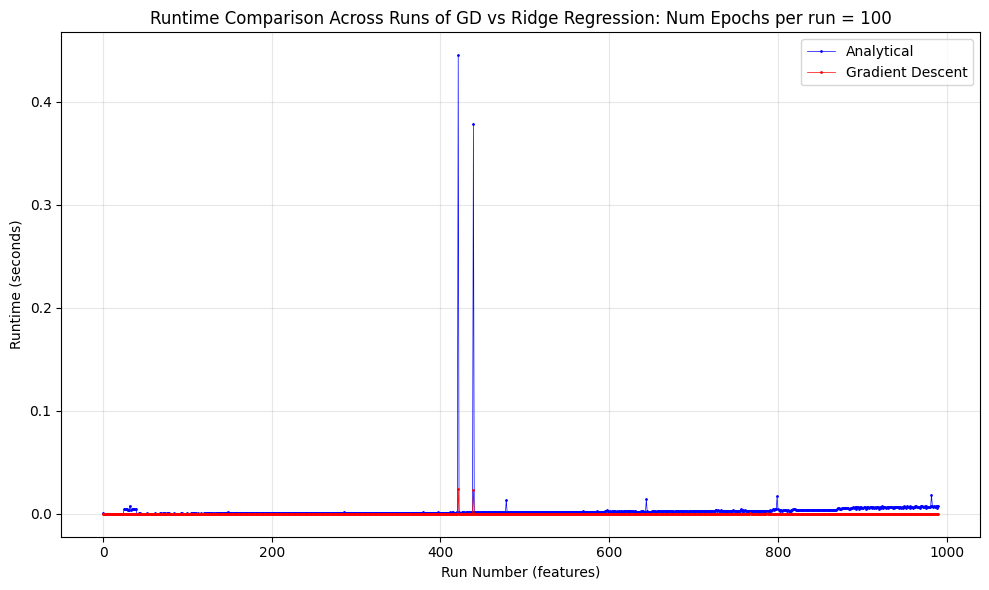

In [25]:
# Alternative: Line plot showing individual runs
plt.figure(figsize=(10, 6))
plt.plot(range(len(test_comp_ridge["feature_count"])), test_comp_ridge["runtimes_ana"], 'bo-', label='Analytical', linewidth=.5, markersize=1)
plt.plot(range(len(test_comp_ridge["feature_count"])), test_comp_ridge["runtimes_gd"], 'ro-', label='Gradient Descent', linewidth=.5, markersize=1)

plt.xlabel('Run Number (features)')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime Comparison Across Runs of GD vs Ridge Regression: Num Epochs per run = 100')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### 5. Report: When would you choose each method in practice?

In practice each of the methods (linear regression, ridge regression, and gradient descent) have pros and cons. I would choose linear regression whenever working with a relatively smaller dataset (say under 50k if there is a reasonable number of features), however I would switch this to ridge regression if multi-collinearity is present (which can be tested for via Variance inflation factors (VIFs) or high correlation among other methods) which could call for reducing the number of features further, and finally gradient descent for large datasets. Of course, memory and runtime play a large factor so if computing resources/timing is the top priorities then applying the feature/runtime trade-off must be considered.
Another note is asking what is the goal of the analysis, if the goal of your regression analysis is predict future values of the response, then multicollinearity may be less of an issue as long as you do not extrapolate.

In [26]:
##  Full Testing  ##

torch.manual_seed(123)

# 1) Ground truth pars and data
TRUE_W = torch.rand(10).reshape(-1, 1) # here we have 2 dimensions
TRUE_B = 4.2
N = 100

X, y = generate_synthetic_data(TRUE_W, TRUE_B, N)
print(f"[Data] True w={TRUE_W.tolist()}, b={TRUE_B:.3f}")

# 2) Initialize the model
model = LinearRegressionScratch(input_size=10)

# 3) Train
losses = train_model(model, X, y, num_epochs=100, verbose=False)
w_learned, b_learned = model.w, model.b
print(f"[Model] Learned params: w={w_learned.tolist()}, b={b_learned.item():.3f}")



##  Analytical solution (Normal Equations)  ##
print("\n2. Analytical solution...")

start_time = time.time()

# Add bias column to X (augment the matrix)
ones_column = torch.ones(X.shape[0], 1, dtype=X.dtype, device=X.device)
X_augmented = torch.cat([X, ones_column], dim=1)
print(f"X shape: {X.shape} -> X_augmented shape: {X_augmented.shape}")

# Normal equations: w = (X^T X)^(-1) X^T y
XTX = X_augmented.T @ X_augmented # Using @ for matrix multiplication
XTy = X_augmented.T @ y
w_analytical = torch.linalg.solve(XTX, XTy)  # More stable than inverse

w_opt, b_opt = w_analytical[:-1], w_analytical[-1].item() # must drop last value since that value is b so 10x1 length tensor.
y_pred_analytical = X @ w_opt + b_opt
analytic_loss_optimal = torch.mean((y - y_pred_analytical) ** 2).item()

analytical_time = time.time() - start_time

print(f"Analytical solution: w={w_opt.tolist()}, b={b_opt:.4f}") # to show tensor make it a list
print(f"Optimal loss: {analytic_loss_optimal:.4f}")


##  Iterative solution (gradient descent)  ##
print("\n3. Gradient descent...")

start_time = time.time()


w_gd, b_gd, gd_loss = model.w, model.b, model.step(X, y)


gd_time = time.time() - start_time
    
print(f"\nGradient descent result: w={w_gd.tolist()}, b={b_gd.item():.4f}")
print(f"Optimal loss: {gd_loss:.4f}")
# Compare solutions and convergence
print(f"Difference of Gradient Descent from Analytical: Δw={w_gd-w_opt}, Δb={abs(b_gd.item()-b_opt):.6f}")

# Time both approaches
    ##  Timing setup in the comparison portion, timing printed here  ##
print(f"Analytical(Normal) Time: {analytical_time:.6f} seconds")
print(f"Gradient Descent(Iterative) Time: {gd_time:.6f} seconds")

[Data] True w=[[0.29611194133758545], [0.516562283039093], [0.2516707181930542], [0.6885567903518677], [0.07397246360778809], [0.866521954536438], [0.13657987117767334], [0.10247904062271118], [0.18405646085739136], [0.7264467477798462]], b=4.200
[Model] Learned params: w=[[0.3066205382347107], [0.5164799690246582], [0.25256896018981934], [0.6867920160293579], [0.08186747878789902], [0.8648491501808167], [0.13009943068027496], [0.09702868014574051], [0.17742697894573212], [0.7226340770721436]], b=4.186

2. Analytical solution...
X shape: torch.Size([100, 10]) -> X_augmented shape: torch.Size([100, 11])
Analytical solution: w=[[0.29611098766326904], [0.5170899629592896], [0.25199124217033386], [0.6887696385383606], [0.07396590709686279], [0.8680174350738525], [0.13562077283859253], [0.1026635468006134], [0.18264275789260864], [0.7254683375358582]], b=4.2002
Optimal loss: 0.0001

3. Gradient descent...

Gradient descent result: w=[[0.30649542808532715], [0.5164957046508789], [0.252562761

In [ ]:
##  Full Testing 2  ##

    # In order to maintain some readability on numerical outputs I am taking the average of the gradient descent and normal equation difference. 

torch.manual_seed(123)
    
# 1) Ground truth pars and data
TRUE_W = torch.rand(100).reshape(-1, 1) # here we have 2 dimensions
TRUE_B = 4.2
N = 100

X, y = generate_synthetic_data(TRUE_W, TRUE_B, N)
print(f"[Data] True w={TRUE_W.tolist()}, b={TRUE_B:.3f}")

# 2) Initialize the model
model = LinearRegressionScratch(input_size=100)

# 3) Train
losses = train_model(model, X, y, num_epochs=100, verbose=False)
w_learned, b_learned = model.w, model.b
print(f"[Model] Learned params: w={w_learned.tolist()}, b={b_learned.item():.3f}")

##  Analytical solution (Normal Equations)  ##
print("\n2. Analytical solution...")

start_time = time.time()

# Add bias column to X (augment the matrix)
ones_column = torch.ones(X.shape[0], 1, dtype=X.dtype, device=X.device)
X_augmented = torch.cat([X, ones_column], dim=1)
print(f"X shape: {X.shape} -> X_augmented shape: {X_augmented.shape}")

# Normal equations: w = (X^T X)^(-1) X^T y
XTX = X_augmented.T @ X_augmented # Using @ for matrix multiplication
XTy = X_augmented.T @ y
w_analytical = torch.linalg.solve(XTX, XTy)  # More stable than inverse

w_opt, b_opt = w_analytical[:-1], w_analytical[-1].item() # must drop last value since that value is b so 100x1 length tensor.
analytic_loss_optimal = model.compute_mse_loss(X, y)

analytical_time = time.time() - start_time

print(f"Analytical solution: w={w_opt.tolist()}, b={b_opt:.4f}") # to show tensor make it a list
print(f"Optimal loss: {analytic_loss_optimal:.4f}")


##  Iterative solution (gradient descent)  ##
print("\n3. Gradient descent...")

start_time = time.time()

w_gd, b_gd, gd_loss = model.w, model.b, model.step(X, y)

gd_time = time.time() - start_time
    
print(f"\nGradient descent result: w={w_gd.tolist()}, b={b_gd.item():.4f}")
print(f"Optimal loss: {gd_loss:.4f}")

# Compare solutions and convergence
print(f"Difference of Gradient Descent from Analytical: Δw={w_gd-w_opt}, Δb={abs(b_gd.item()-b_opt):.6f}")

# Time both approaches
    ##  Timing setup in the comparison portion, timing printed here  ##
print(f"Analytical(Normal) Time: {analytical_time:.6f} seconds")
print(f"Gradient Descent(Iterative) Time: {gd_time:.6f} seconds")

# Problem 3 (10 pts): SGD Exploration - Escaping Local Minima (Extended)
Learning Objectives: Understand SGD's stochastic nature and hyperparameter effects.

Part A: In the Google Colab code for Module 1 ([link](https://colab.research.google.com/drive/1dXLaMnIOQtcBqCZ9LnPiSEpVYmtviRxB?usp=sharing)), we code the Two-Hole Landscape, now extend it:

In [2]:
##  Testing functions for checking global minimum, making gradients and noise given batch, and running SDG  ##
##  Adapted from Notes.  ##

# STEP 1: Same loss landscape (your original) - From Notes
def loss_function(w):
    """
    Your original two-hole function

    Center: (w1, w2) = this is where the local minimum occurs
    Amplitude: -2.0 - maximum depth of this hole
    Width: 0.2 - how narrow/wide the hole is (smaller = narrower)
    Sign: Negative, so it creates a "hole" (minimum)
    
    For any function of the form f(x) = -A * exp(-((x - c)²)/σ²):
    The minimum occurs at x = c
        This is where the derivative equals zero
    """
    w1, w2 = w[0], w[1]
    local_min = -2.0 * np.exp(-((w1 - 1.5)**2 + (w2 - 1.5)**2) / 0.2)
    global_min = -3.5 * np.exp(-((w1 + 1.5)**2 + (w2 + 1.5)**2) / 1.5)
    ## Example: Move local min to (3.0, -2.0) and global min to (0.0, 0.0) so w1-1.5 and w2-1.5 is now w1-3.0 and w2+2.0 etc.!
    return local_min + global_min

def get_gradient_components(w):
    """
    Your original gradient computation
    """
    w1, w2 = w[0], w[1]
    local_loss = -2.0 * np.exp(-((w1 - 1.5)**2 + (w2 - 1.5)**2) / 0.2)
    global_loss = -3.5 * np.exp(-((w1 + 1.5)**2 + (w2 + 1.5)**2) / 1.5)

    grad_local_w1 = (w1 - 1.5) / 0.2 * (-2.0) * local_loss
    grad_local_w2 = (w2 - 1.5) / 0.2 * (-2.0) * local_loss
    grad_local = np.array([grad_local_w1, grad_local_w2])

    grad_global_w1 = (w1 + 1.5) / 1.5 * (-2.0) * global_loss
    grad_global_w2 = (w2 + 1.5) / 1.5 * (-2.0) * global_loss
    grad_global = np.array([grad_global_w1, grad_global_w2])

    return grad_local, grad_global


##  STEP 2: 
def is_at_global_min(w, global_min_location = np.array([-1.5, -1.5]), tolerance=0.3): ### this global min is set above in the loss_function
    """
    Check if the optimizer reached the global minimum
    
    If otimizer's current position w is within tolerance=0.3 distance of the true global minimum
    """
    return np.linalg.norm(w - global_min_location) < tolerance



def simulate_batch_effect(grad, batch_size, base_noise=0.1):
    # Simluating batch effect on gradient
    """
    Simulate the effect of different batch sizes on gradient estimation

    Example:
    Batch size = 1: High noise might help jump out of the local minimum
    Batch size = 64: Low noise might get trapped in local minimum but converge smoothly if it reaches the global basin
    """
    # Smaller batch sizes have more noise
    noise_factor = 1.0 / np.sqrt(batch_size) # 1.0 is just normalization so we are decreasing by a specified amount based on batch_size. example(batch size 16). noise_factor = 1.0 / sqrt(16) = 0.25   (4x less noisy)
    # Generate random noise (2D since we have 2 parameters w1, w2)
    noise = np.random.randn(2) * base_noise * noise_factor # random value for noise * noise_scale is the base noise * noise_factor
    # Add noise to the true gradient
    return grad + noise



def run_sgd_params(start_point, # my w values
                   lr=0.04,
                   batch_size = 1,
                   noise_scale = 1.0,
                   max_iterations = 300,
                   noise_decay=0.995,
                   escape_chance=0.25, 
                   tolerance = 1e-6, 
                   seed = 123
                  ):
    
    """
    SGD with configurable parameters for hyperparameter study
    
    Returns:
    - path: optimization trajectory
    - final_loss: loss at final position
    - converged: whether it converged
    - reached_global: whether it reached the global minimum
    - iterations: number of iterations taken
    """

    path = [start_point]
    w = start_point.copy()
    
    for i in range(max_iterations):
        grad_local, grad_global = get_gradient_components(w)
        true_grad = grad_local + grad_global

        batch_grad = simulate_batch_effect(true_grad, batch_size, noise_scale)
            
        # Adaptive noise - decreases over time for better fine-tuning
        if np.random.rand() < escape_chance:
            stochastic_grad = grad_global + np.random.randn(2) * noise_scale
        else:
            stochastic_grad = true_grad + np.random.randn(2) * noise_scale

        # Decay noise over time (helps with fine convergence)
        noise_scale *= noise_decay    
        
        # Check for convergence (but be more lenient due to noise)
        if np.linalg.norm(true_grad) < tolerance:
            final_loss = loss_function(w)
            reached_global = is_at_global_min(w)
            return {
                'path': np.array(path),
                'final_loss': final_loss,
                'converged': True,
                'reached_global': reached_global,
                'iterations': i + 1
            }
        
        # Update parameters
        w = w - lr * batch_grad
        path.append(w.copy())
       
    # Did not converge within max_iterations
    final_loss = loss_function(w)
    reached_global = is_at_global_min(w)
    
    return {
        'path': np.array(path),
        'final_loss': final_loss,
        'converged': False,
        'reached_global': reached_global,
        'iterations': max_iterations
    }

    

In [3]:
def run_single_trial(start_point, lr, batch_size, noise_scale, trial_seed):
    """Run a single trial with given parameters"""
    result = run_sgd_params(
        start_point=start_point,
        lr=lr,
        batch_size=batch_size,
        noise_scale=noise_scale,
        max_iterations=1000,
        tolerance=1e-6,
        seed=trial_seed
    )
    return result

In [4]:
result = run_single_trial(start_point = np.array([0.9, 0.9]), lr=0.04, batch_size=16, noise_scale=0.1, trial_seed=123)
result

{'path': array([[0.9       , 0.9       ],
        [0.91213766, 0.91165538],
        [0.92572171, 0.92811387],
        ...,
        [1.49999042, 1.49998923],
        [1.49999603, 1.4999914 ],
        [1.49999166, 1.49999639]], shape=(1001, 2)),
 'final_loss': np.float64(-2.000021504944994),
 'converged': False,
 'reached_global': np.False_,
 'iterations': 1000}

In [5]:
## Part B: Systematic Hyperparameter Study

def sgd_parameter_study():
    learning_rates = [0.01, 0.05, 0.1, 0.2]
    batch_sizes = [1, 4, 16, 64]  # Simulate different batch sizes
    noise_scales = [0.1, 0.5, 1.0, 2.0]

    # For each combination:
    # - Run 20 trials from the same starting point
    # - Record: final loss, success rate (reaching global min), convergence time
    # - Create heatmaps showing success rate vs. (lr, batch_size)
    
    start_point = np.array([0.9, 0.9])
    n_trials = 20
    
    results = {}
    
    print("Running SGD hyperparameter study...")
    print(f"Parameters to test: {len(learning_rates)} LRs × {len(batch_sizes)} batch sizes × {len(noise_scales)} noise scales")
    print(f"Total combinations: {len(learning_rates) * len(batch_sizes) * len(noise_scales)}")
    print(f"Trials per combination: {n_trials}")
    print(f"Total runs: {len(learning_rates) * len(batch_sizes) * len(noise_scales) * n_trials}")
    
    total_combinations = len(learning_rates) * len(batch_sizes) * len(noise_scales)
    combination_count = 0
    
    for lr in learning_rates:
        for batch_size in batch_sizes:
            for noise_scale in noise_scales:
                combination_count += 1
                
                combo_key = (lr, batch_size, noise_scale)
                trial_results = []
                
                for trial in range(n_trials):
                    trial_seed = 123 + trial  # Different seed for each trial
                    result = run_single_trial(start_point, lr, batch_size, noise_scale, trial_seed)
                    trial_results.append(result)
                
                # Aggregate results using line comprehension tools
                final_losses = [r['final_loss'] for r in trial_results]
                success_count = sum([r['reached_global'] for r in trial_results])
                convergence_times = [r['iterations'] for r in trial_results if r['converged']]
                
                results[combo_key] = {
                    'final_losses': final_losses,
                    'mean_final_loss': np.mean(final_losses),
                    'success_rate': success_count / n_trials,
                    'mean_convergence_time': np.mean(convergence_times) if convergence_times else np.nan,
                    'convergence_rate': len(convergence_times) / n_trials
                }
                
                #print(f"\nSuccess rate: {results[combo_key]['success_rate']:.2f}")
                #print(f"\nMean final loss: {results[combo_key]['mean_final_loss']:.4f}")
    create_heatmaps(results)
    analyze_results(results)
    return results

In [6]:
##  Heatmap for results  ##

def create_heatmaps(results):
    """
    Create heatmaps for visualization
    """
    learning_rates = [0.01, 0.05, 0.1, 0.2]
    batch_sizes = [1, 4, 16, 64]
    noise_scales = [0.1, 0.5, 1.0, 2.0]
    
    # Create figure with subplots for different noise scales
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    for idx, noise_scale in enumerate(noise_scales):
        # Create success rate matrix for this noise scale
        success_matrix = np.zeros((len(learning_rates), len(batch_sizes)))
        
        for i, lr in enumerate(learning_rates):
            for j, batch_size in enumerate(batch_sizes):
                combo_key = (lr, batch_size, noise_scale)
                if combo_key in results:
                    success_matrix[i, j] = results[combo_key]['success_rate']
        
        # Create heatmap
        im = axes[idx].imshow(success_matrix, cmap='RdYlGn', vmin=0, vmax=1, aspect='auto')
        axes[idx].set_title(f'Success Rate (Noise Scale = {noise_scale})')
        axes[idx].set_xlabel('Batch Size')
        axes[idx].set_ylabel('Learning Rate')
        
        # Set tick labels
        axes[idx].set_xticks(range(len(batch_sizes)))
        axes[idx].set_xticklabels(batch_sizes)
        axes[idx].set_yticks(range(len(learning_rates)))
        axes[idx].set_yticklabels(learning_rates)
        
        # Add text annotations
        for i in range(len(learning_rates)):
            for j in range(len(batch_sizes)):
                text = axes[idx].text(j, i, f'{success_matrix[i, j]:.2f}',
                                    ha="center", va="center", color="black", fontsize=8)
    
    plt.tight_layout()
    plt.colorbar(im, ax=axes.tolist(), label='Success Rate')
    plt.show()
    
    return fig

In [33]:
def analyze_results(results):
    """
    Analyze and print summary statistics
    """
    print("\nHYPERPARAMETER STUDY ANALYSIS")
    
    # Find best combinations
    best_success = max(results.items(), key=lambda x: x[1]['success_rate'])
    best_loss = min(results.items(), key=lambda x: x[1]['mean_final_loss'])
    
    # Find best convergence time (only among combinations that actually converge)
    converging_results = {k: v for k, v in results.items() if not np.isnan(v['mean_convergence_time'])}
    if converging_results:
        best_convergence = min(converging_results.items(), key=lambda x: x[1]['mean_convergence_time'])
    else:
        best_convergence = None
    
    print(f"\nBest Success Rate: {best_success[1]['success_rate']:.3f}")
    print(f"  Parameters: LR={best_success[0][0]}, Batch={best_success[0][1]}, Noise={best_success[0][2]}")
    print(f"  Avg Convergence Time: {best_success[1]['mean_convergence_time']:.1f} iterations" if not np.isnan(best_success[1]['mean_convergence_time']) else "  No convergence data")
    
    print(f"\nBest Final Loss: {best_loss[1]['mean_final_loss']:.6f}")
    print(f"  Parameters: LR={best_loss[0][0]}, Batch={best_loss[0][1]}, Noise={best_loss[0][2]}")
    print(f"  Avg Convergence Time: {best_loss[1]['mean_convergence_time']:.1f} iterations" if not np.isnan(best_loss[1]['mean_convergence_time']) else "  No convergence data")
    
    if best_convergence:
        print(f"\nFastest Convergence: {best_convergence[1]['mean_convergence_time']:.1f} iterations")
        print(f"  Parameters: LR={best_convergence[0][0]}, Batch={best_convergence[0][1]}, Noise={best_convergence[0][2]}")
        print(f"  Success Rate: {best_convergence[1]['success_rate']:.3f}")
    
    # Summary statistics
    all_success_rates = [r['success_rate'] for r in results.values()]
    all_convergence_times = [r['mean_convergence_time'] for r in results.values() if not np.isnan(r['mean_convergence_time'])]
    
    # Analyze trends - Updated table with convergence time
    print(f"\nTop 10 Parameter Combinations (by Success Rate):")
    print(f"{'Parameter Combination':<25} {'Success':<8} {'Mean Loss':<10} {'Conv Rate':<10} {'Conv Time':<12}")
    print("-" * 85)
    
    for combo, result in sorted(results.items(), key=lambda x: x[1]['success_rate'], reverse=True)[:10]:
        lr, batch_size, noise = combo
        conv_time_str = f"{result['mean_convergence_time']:8.1f}" if not np.isnan(result['mean_convergence_time']) else "     N/A"
        print(f"LR={lr:4.2f}, B={batch_size:2d}, N={noise:3.1f}     {result['success_rate']:6.3f}   {result['mean_final_loss']:8.4f}   {result['convergence_rate']:8.3f}   {conv_time_str}")

Running SGD hyperparameter study...
Parameters to test: 4 LRs × 4 batch sizes × 4 noise scales
Total combinations: 64
Trials per combination: 20
Total runs: 1280


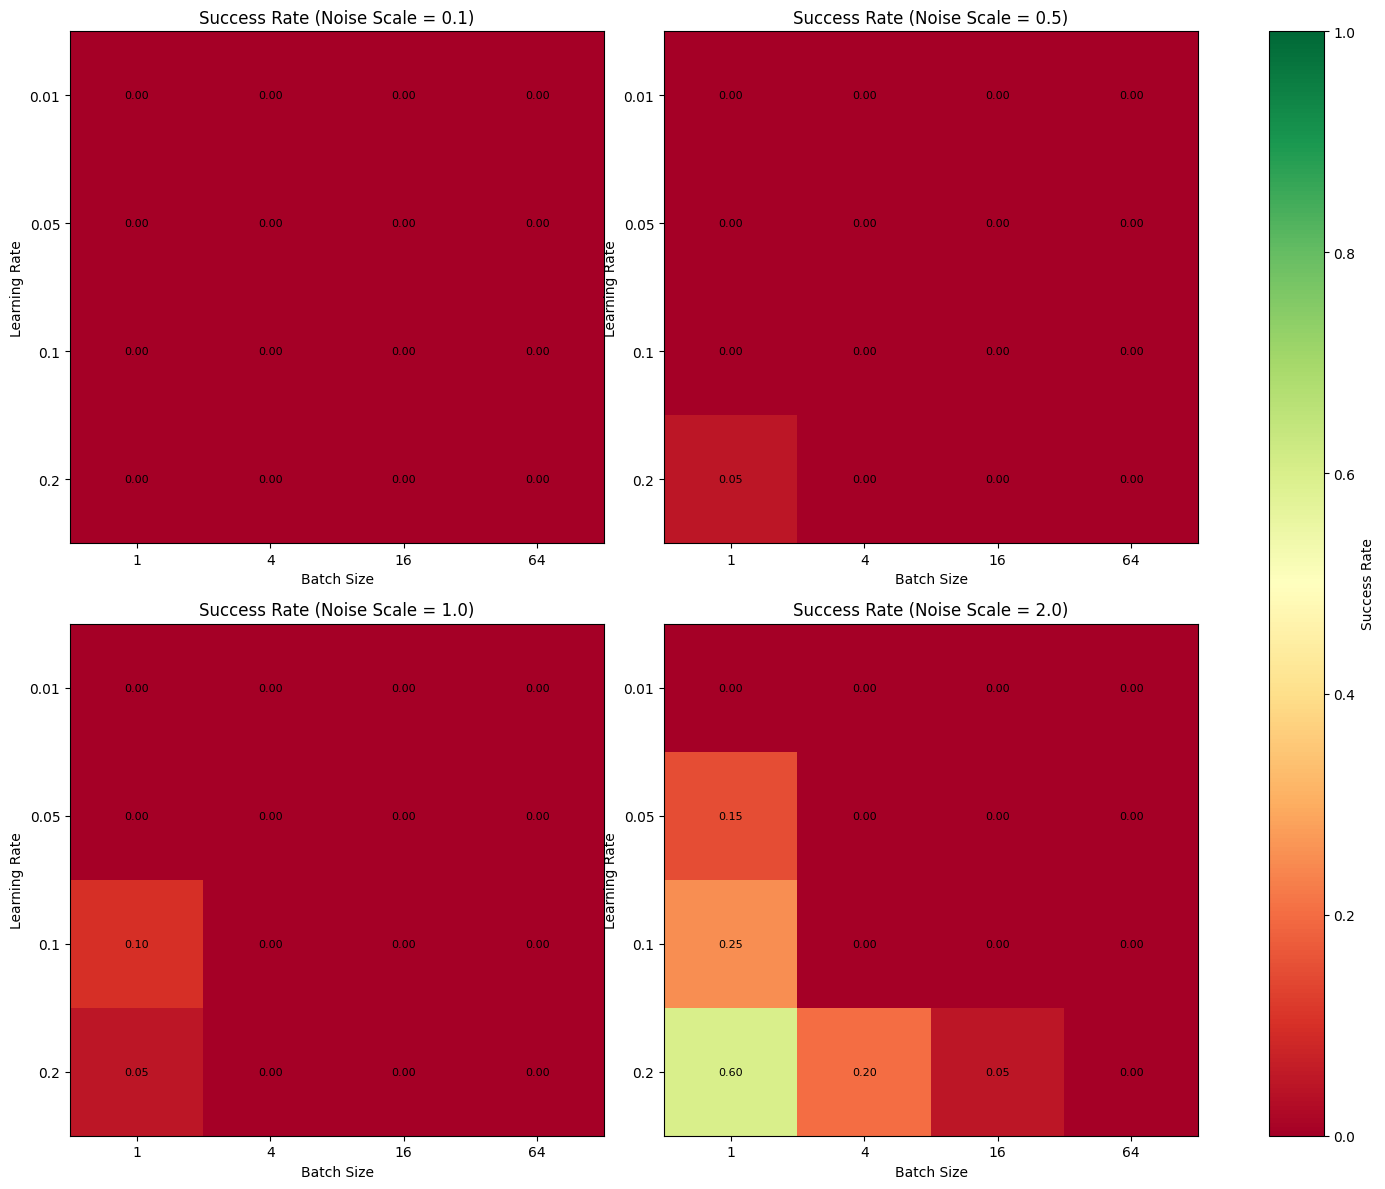


HYPERPARAMETER STUDY ANALYSIS

Best Success Rate: 0.600
  Parameters: LR=0.2, Batch=1, Noise=2.0
  Avg Convergence Time: 33.5 iterations

Best Final Loss: -2.342769
  Parameters: LR=0.1, Batch=1, Noise=2.0
  No convergence data

Fastest Convergence: 10.0 iterations
  Parameters: LR=0.2, Batch=1, Noise=1.0
  Success Rate: 0.050

Top 10 Parameter Combinations (by Success Rate):
Parameter Combination     Success  Mean Loss  Conv Rate  Conv Time   
-------------------------------------------------------------------------------------
LR=0.20, B= 1, N=2.0      0.600    -2.0952      0.400       33.5
LR=0.10, B= 1, N=2.0      0.250    -2.3428      0.000        N/A
LR=0.20, B= 4, N=2.0      0.200    -1.4880      0.100       37.5
LR=0.05, B= 1, N=2.0      0.150    -2.2238      0.000        N/A
LR=0.10, B= 1, N=1.0      0.100    -2.1335      0.000        N/A
LR=0.20, B= 1, N=0.5      0.050    -1.2163      0.000        N/A
LR=0.20, B= 1, N=1.0      0.050    -1.1362      0.050       10.0
LR=0.20, 

In [39]:
##  Run the study  ##
results = sgd_parameter_study()

In [18]:
## Part C: Design Your Own Landscape
## Create a more complex loss function with 3+ minima:

def multi_modal_loss(w):
    # Design a function with multiple local minima of different qualities
    # Include saddle points for extra challenge
    """
    Complex loss function with multiple minima and saddle points
    """
        
    w1, w2 = w[0], w[1]  # Extract x and y coordinates
    
    # Global minimum - deepest hole at (-2, 2)
    global_min = -4.0 * np.exp(-((w1 + 2.0)**2 + (w2 - 2.0)**2) / 2.0)
    # -4.0 = depth, (-2,2) = center location, 2.0 = width of basin
    
    # Local minimum 1 - shallow hole at (2.5, 2.5) 
    local_min1 = -2.5 * np.exp(-((w1 - 2.5)**2 + (w2 - 2.5)**2) / 0.3)
    # -2.5 = depth (less than global), 0.3 = very narrow (hard to escape)
    
    # Local minimum 2 - medium hole at (1, -2.5)
    local_min2 = -1.8 * np.exp(-((w1 - 1.0)**2 + (w2 + 2.5)**2) / 0.8)
    # -1.8 = shallowest, 0.8 = medium width
    
    # Local minimum 3 - medium hole at (1.5, -1.5)
    local_min3 = -2.1 * np.exp(-((w1 - 1.5)**2 + (w2 + 1.5)**2) / 1.2)
    # -2.1 = shallowest, 1.2 = medium width
    
    # Saddle point - goes down in w1 direction, up in w2 direction
    saddle = -1.2 * np.exp(-((w1 - 0.5)**2) / 1.5) * np.exp(((w2 - 0.5)**2) / 1.5)
    # Notice: negative exponent for w1 (valley), positive for w2 (hill)

    # Saddle point 2 - goes up in w1 direction, down in w2 direction  
    saddle2 = -0.8 * np.exp(((w1 + 1.5)**2) / 1.2) * np.exp(-((w2 + 1.0)**2) / 1.2)
    # Notice: positive exponent for w1 (hill), negative for w2 (valley)
    
    return global_min + local_min1 + local_min2 + local_min3 + saddle + saddle2  # Add all components



In [22]:
def multi_modal_loss(w1, w2):
    """
    Complex loss function with multiple minima and saddle points
    """
    # Global minimum - deepest hole at (-2, 2)
    global_min = -4.0 * np.exp(-((w1 + 2.0)**2 + (w2 - 2.0)**2) / 2.0)
    
    # Local minimum 1 - shallow hole at (2.5, 2.5)
    local_min1 = -2.5 * np.exp(-((w1 - 2.5)**2 + (w2 - 2.5)**2) / 0.3)
    
    # Local minimum 2 - medium hole at (1, -2.5)
    local_min2 = -1.8 * np.exp(-((w1 - 1.0)**2 + (w2 + 2.5)**2) / 0.8)
    
    # Local minimum 3 - medium hole at (1.5, -1.5)
    local_min3 = -2.1 * np.exp(-((w1 - 1.5)**2 + (w2 + 1.5)**2) / 1.2)
    
    # Proper saddle point 1 at (0.5, 0.5) - negative curvature in w1, positive in w2
    saddle1 = 0.8 * (w1 - 0.5)**2 - 0.6 * (w2 - 0.5)**2
    saddle1 *= np.exp(-((w1 - 0.5)**2 + (w2 - 0.5)**2) / 2.0)
    
    # Proper saddle point 2 at (-1.5, -1.0) - positive curvature in w1, negative in w2
    saddle2 = -0.5 * (w1 + 1.5)**2 + 0.7 * (w2 + 1.0)**2
    saddle2 *= np.exp(-((w1 + 1.5)**2 + (w2 + 1.0)**2) / 1.5)
    
    # Add a gentle background quadratic to create overall structure
    background = 0.1 * (w1**2 + w2**2)
    
    return global_min + local_min1 + local_min2 + local_min3 + saddle1 + saddle2 + background

In [25]:
multi_modal_loss(np.array([0.9, 0.9]), np.array([0.9, 0.9]))

array([0.14318923, 0.14318923])

In [26]:
##  From above  ##
loss_function(np.array([0.9, 0.9]))

np.float64(-0.05626435704032092)

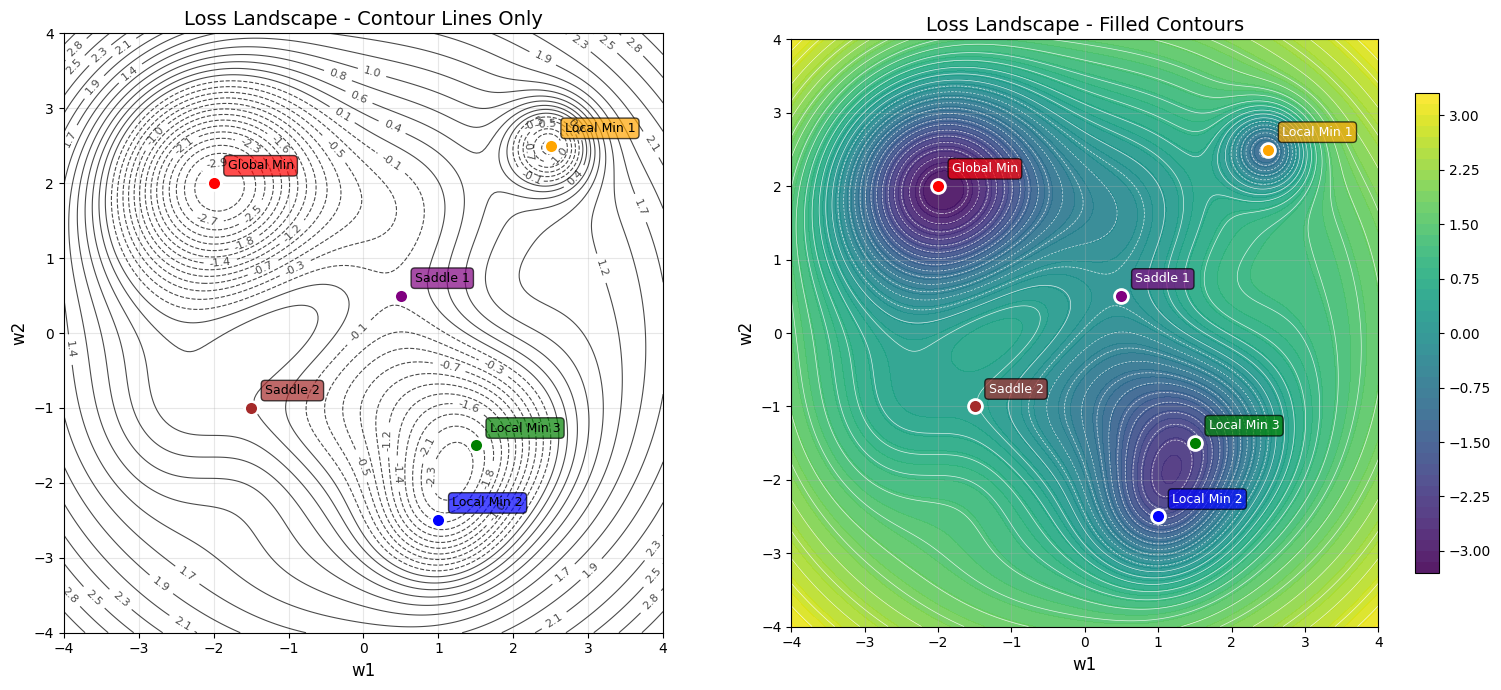

Verification of critical points:
Eigenvalues of Hessian at each point:
Global Min at (-2, 2): eigenvalues = [4.080, 4.563] -> Minimum
Local Min 1 at (2.5, 2.5): eigenvalues = [16.700, 17.067] -> Minimum
Local Min 2 at (1, -2.5): eigenvalues = [5.838, 3.260] -> Minimum
Local Min 3 at (1.5, -1.5): eigenvalues = [4.247, 2.179] -> Minimum
Saddle 1 at (0.5, 0.5): eigenvalues = [1.612, -1.542] -> Saddle
Saddle 2 at (-1.5, -1.0): eigenvalues = [-1.067, 1.597] -> Saddle


In [30]:
# Create finer grid for better visualization
w1 = np.linspace(-4, 4, 200)
w2 = np.linspace(-4, 4, 200)
W1, W2 = np.meshgrid(w1, w2)

# Calculate loss values
Z = multi_modal_loss(W1, W2)

# Create the plot with better visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Left plot: Contour lines only
contour_levels = np.linspace(Z.min(), Z.max(), 30)
cs1 = ax1.contour(W1, W2, Z, levels=contour_levels, colors='black', linewidths=0.8, alpha=0.7)
ax1.clabel(cs1, inline=True, fontsize=8, fmt='%.1f')

# Right plot: Filled contours with lines
cs2 = ax2.contourf(W1, W2, Z, levels=50, cmap='viridis', alpha=0.9)
ax2.contour(W1, W2, Z, levels=contour_levels, colors='white', linewidths=0.5, alpha=0.8)
fig.colorbar(cs2, ax=ax2, shrink=0.8)

# Mark critical points on both plots
critical_points = [
    (-2, 2, 'Global Min', 'red'),
    (2.5, 2.5, 'Local Min 1', 'orange'), 
    (1, -2.5, 'Local Min 2', 'blue'),
    (1.5, -1.5, 'Local Min 3', 'green'),
    (0.5, 0.5, 'Saddle 1', 'purple'),
    (-1.5, -1.0, 'Saddle 2', 'brown')
]

for ax in [ax1, ax2]:
    for x, y, label, color in critical_points:
        ax.plot(x, y, 'o', color=color, markersize=10, 
                markeredgecolor='white', markeredgewidth=2)
        ax.annotate(label, (x, y), xytext=(10, 10), textcoords='offset points',
                   fontsize=9, color='white' if ax == ax2 else 'black',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor=color, alpha=0.7))
    
    ax.set_xlabel('w1', fontsize=12)
    ax.set_ylabel('w2', fontsize=12)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)

ax1.set_title('Loss Landscape - Contour Lines Only', fontsize=14)
ax2.set_title('Loss Landscape - Filled Contours', fontsize=14)

plt.tight_layout()
plt.show()

# Verify saddle points by checking the Hessian
def verify_saddle_point(w1_point, w2_point, h=1e-6):
    """Verify if a point is a saddle by checking eigenvalues of Hessian"""
    # Numerical Hessian calculation
    f_center = multi_modal_loss(w1_point, w2_point)
    
    # Second partial derivatives
    f_xx = (multi_modal_loss(w1_point + h, w2_point) - 2*f_center + multi_modal_loss(w1_point - h, w2_point)) / h**2
    f_yy = (multi_modal_loss(w1_point, w2_point + h) - 2*f_center + multi_modal_loss(w1_point, w2_point - h)) / h**2
    f_xy = (multi_modal_loss(w1_point + h, w2_point + h) - multi_modal_loss(w1_point + h, w2_point - h) - 
            multi_modal_loss(w1_point - h, w2_point + h) + multi_modal_loss(w1_point - h, w2_point - h)) / (4*h**2)
    
    # Hessian matrix
    hessian = np.array([[f_xx, f_xy], [f_xy, f_yy]])
    eigenvalues = np.linalg.eigvals(hessian)
    
    return eigenvalues

print("Verification of critical points:")
print("Eigenvalues of Hessian at each point:")
for x, y, label, _ in critical_points:
    eigenvals = verify_saddle_point(x, y)
    point_type = "Saddle" if eigenvals[0] * eigenvals[1] < 0 else ("Minimum" if np.all(eigenvals > 0) else "Maximum")
    print(f"{label} at ({x}, {y}): eigenvalues = [{eigenvals[0]:.3f}, {eigenvals[1]:.3f}] -> {point_type}")

Part D: Analysis Questions

1. What batch size gives the best exploration vs. exploitation trade-off?
2. How does the "escape probability" change with learning rate?
3. Create an "optimization phase diagram" showing which parameter combinations succeed.

1. Batch size 1 seems to give the best, although 4 has a success run as well. 

2. Going up to 0.2 from .01 the greater the learning rate the greater the chance of escaping the local minima. So Escape probability would increase with learning rate increase (given this study). Likely that exceeding a certain level of learning rate the escape probability is then diminished again.

3. 



In [51]:
from matplotlib.colors import ListedColormap

def create_phase_diagram(results):
    """
    Create phase diagram showing which parameter combinations succeed
    """
        
    learning_rates = sorted(list(set([combo[0] for combo in results.keys()])))
    batch_sizes = sorted(list(set([combo[1] for combo in results.keys()])))
    noise_levels = sorted(list(set([combo[2] for combo in results.keys()])))
    
    # Create matrices for different noise levels
    phase_diagrams = {}
    
    for noise in noise_levels:
        success_matrix = np.full((len(batch_sizes), len(learning_rates)), np.nan)
        
        for combo, result in results.items():
            lr, batch_size, current_noise = combo
            if current_noise == noise and not np.isnan(result.get('success_rate', np.nan)):
                lr_idx = learning_rates.index(lr)
                batch_idx = batch_sizes.index(batch_size)
                success_matrix[batch_idx, lr_idx] = result['success_rate']
        

        phase_diagrams[noise] = success_matrix
    
    return learning_rates, batch_sizes, noise_levels, phase_diagrams

In [52]:
def plot_phase_diagram_fixed(results, figsize=(16, 12)):
    """
    Fixed phase diagram plotting
    """
    learning_rates, batch_sizes, noise_levels, phase_diagrams = create_phase_diagram(results)
    
    n_noise = len(noise_levels)
    if n_noise <= 2:
        ncols = n_noise
        nrows = 1
    else:
        ncols = 2
        nrows = (n_noise + 1) // 2
    
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    
    # Handle subplot indexing
    if n_noise == 1:
        axes = [axes]
    elif nrows == 1:
        axes = list(axes) if ncols > 1 else [axes]
    else:
        axes = axes.flatten()
    
    # Create colormap
    colors = ['#8B0000', '#DC143C', '#FF4500', '#FF8C00', '#FFD700', '#ADFF2F', '#32CD32', '#228B22']
    cmap = ListedColormap(colors)
    
    for i, noise in enumerate(noise_levels):
        ax = axes[i]
        success_matrix = phase_diagrams[noise]
        
        # Check if we have valid data
        valid_data = ~np.isnan(success_matrix)
        
        if not np.any(valid_data):
            ax.text(0.5, 0.5, f'No data for noise={noise:.1f}', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'Noise Scale = {noise:.1f}')
            continue
        
        # Plot heatmap
        im = ax.imshow(success_matrix, cmap=cmap, aspect='auto',
                      vmin=0, vmax=1, origin='lower', interpolation='nearest')
        
        # Set labels
        ax.set_xticks(range(len(learning_rates)))
        ax.set_xticklabels([f'{lr:.3f}' for lr in learning_rates], rotation=45)
        ax.set_yticks(range(len(batch_sizes)))
        ax.set_yticklabels([str(int(bs)) for bs in batch_sizes])
        
        ax.set_xlabel('Learning Rate')
        ax.set_ylabel('Batch Size')
        ax.set_title(f'Success Rate (Noise = {noise:.1f})')
        
        # Add text annotations for success rates
        for bi in range(len(batch_sizes)):
            for li in range(len(learning_rates)):
                success_val = success_matrix[bi, li]
                if not np.isnan(success_val):
                    color = 'white' if success_val < 0.5 else 'black'
                    ax.text(li, bi, f'{success_val:.2f}', 
                           ha='center', va='center', color=color, fontsize=8)
    
    # Hide unused subplots
    for j in range(len(noise_levels), len(axes)):
        axes[j].set_visible(False)
    
    # Add colorbar
    if np.any([np.any(~np.isnan(phase_diagrams[noise])) for noise in noise_levels]):
        cbar = fig.colorbar(im, ax=axes[:len(noise_levels)], shrink=0.8)
        cbar.set_label('Success Rate')
        cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    
    plt.suptitle('SGD Optimization Phase Diagram\n(Success = Reaching Global Minimum)', fontsize=16)
    plt.tight_layout()
    plt.show()

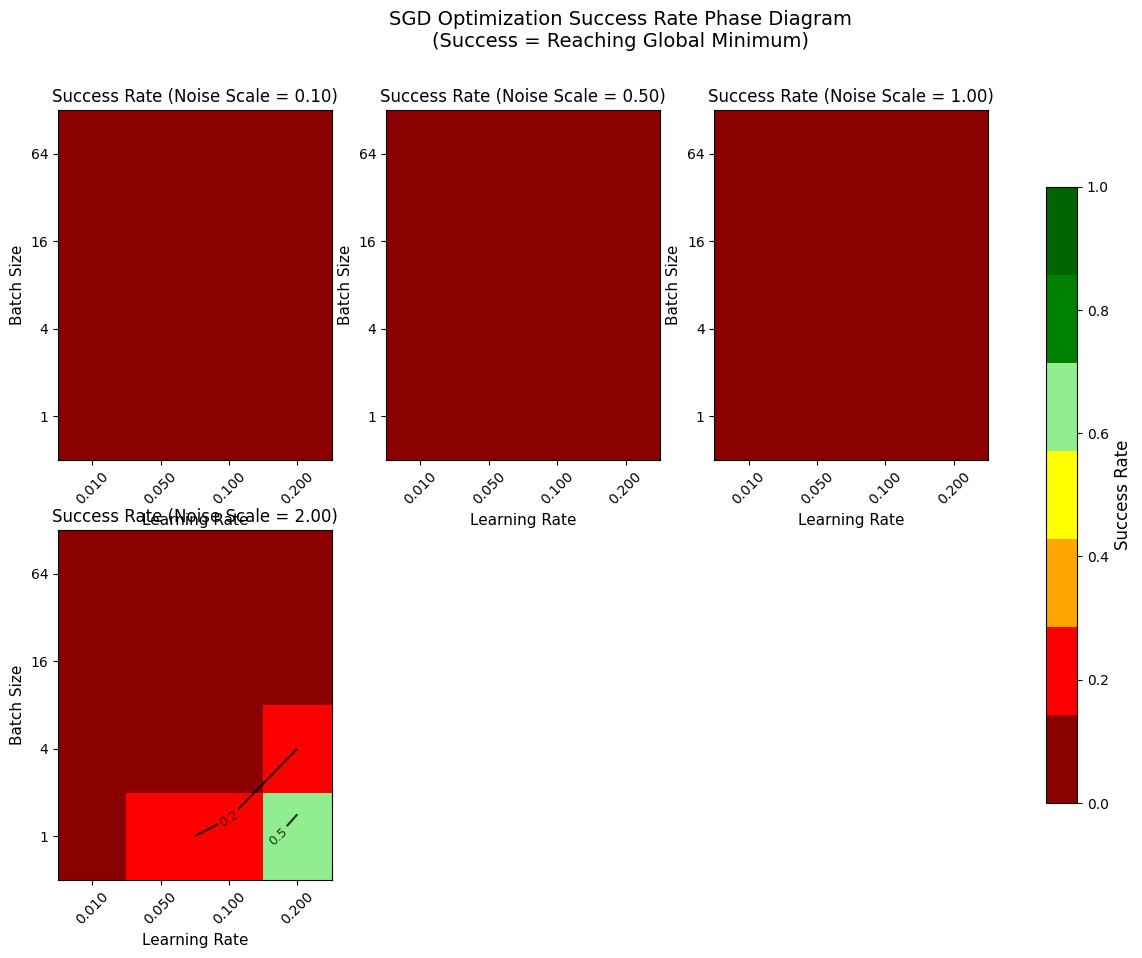

In [53]:
plot_phase_diagram(results)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# =============================================================================
# IMPROVED CONVERGENCE + 3D VISUALIZATION
# =============================================================================

def sgd_3d_demo():
    """
    1. Adaptive noise (decreases over time)
    3. 3D visualization
    4. More realistic stopping conditions
    """

    print("=== SGD vs GD: 3D VISUALIZATION + IMPROVED CONVERGENCE ===")

    # STEP 1: Same loss landscape (your original)
    def loss_function(w):
        """Your original two-hole function"""
        w1, w2 = w[0], w[1]
        local_min = -2.0 * np.exp(-((w1 - 1.5)**2 + (w2 - 1.5)**2) / 0.2)
        global_min = -3.5 * np.exp(-((w1 + 1.5)**2 + (w2 + 1.5)**2) / 1.5)
        return local_min + global_min

    def get_gradient_components(w):
        """Your original gradient computation"""
        w1, w2 = w[0], w[1]
        local_loss = -2.0 * np.exp(-((w1 - 1.5)**2 + (w2 - 1.5)**2) / 0.2)
        global_loss = -3.5 * np.exp(-((w1 + 1.5)**2 + (w2 + 1.5)**2) / 1.5)

        grad_local_w1 = (w1 - 1.5) / 0.2 * (-2.0) * local_loss
        grad_local_w2 = (w2 - 1.5) / 0.2 * (-2.0) * local_loss
        grad_local = np.array([grad_local_w1, grad_local_w2])

        grad_global_w1 = (w1 + 1.5) / 1.5 * (-2.0) * global_loss
        grad_global_w2 = (w2 + 1.5) / 1.5 * (-2.0) * global_loss
        grad_global = np.array([grad_global_w1, grad_global_w2])

        return grad_local, grad_global

    # STEP 2: Improved optimizers with better convergence
    def run_gd_improved(start_point, lr=0.04, max_iterations=300, tolerance=1e-6):
        """GD with early stopping based on gradient magnitude"""
        path = [start_point]
        w = start_point.copy()

        for iteration in range(max_iterations):
            grad_local, grad_global = get_gradient_components(w)
            true_grad = grad_local + grad_global

            # Check for convergence
            if np.linalg.norm(true_grad) < tolerance:
                print(f"  GD converged after {iteration} iterations")
                break

            w = w - lr * true_grad
            path.append(w.copy())

        return np.array(path)

    def run_sgd_improved(start_point, lr=0.04, max_iterations=300,
                        initial_noise=2.0, noise_decay=0.995,
                        escape_chance=0.25, tolerance=1e-6, seed=42):
        """SGD with adaptive noise and better convergence"""
        np.random.seed(seed)
        path = [start_point]
        w = start_point.copy()

        noise_scale = initial_noise

        for iteration in range(max_iterations):
            grad_local, grad_global = get_gradient_components(w)
            true_grad = grad_local + grad_global

            # Adaptive noise - decreases over time for better fine-tuning
            if np.random.rand() < escape_chance:
                stochastic_grad = grad_global + np.random.randn(2) * noise_scale
            else:
                stochastic_grad = true_grad + np.random.randn(2) * noise_scale

            # Check for convergence (but be more lenient due to noise)
            if np.linalg.norm(true_grad) < tolerance and noise_scale < 0.1:
                print(f"  SGD converged after {iteration} iterations")
                break

            w = w - lr * stochastic_grad
            path.append(w.copy())

            # Decay noise over time (helps with fine convergence)
            noise_scale *= noise_decay

        return np.array(path)

    # STEP 3: Create 3D visualization
    def create_3d_visualization(start_point):
        """Create beautiful 3D landscape visualization"""

        # Create high-resolution grid for smooth surface
        x_range = np.linspace(-3, 3, 80)
        y_range = np.linspace(-3, 3, 80)
        X_grid, Y_grid = np.meshgrid(x_range, y_range)
        Z_grid = np.zeros_like(X_grid)

        for i in range(len(x_range)):
            for j in range(len(y_range)):
                Z_grid[j, i] = loss_function([X_grid[j, i], Y_grid[j, i]])

        # Run optimizers
        print("\nRunning improved optimizers...")
        path_gd = run_gd_improved(start_point, lr=0.04, max_iterations=300)

        # Run multiple SGD trials
        sgd_paths = []
        for i, seed in enumerate([42, 123, 456, 789]):
            print(f"SGD Trial {i+1}:")
            path_sgd = run_sgd_improved(start_point, lr=0.04, max_iterations=300,
                                       initial_noise=2.0, seed=seed)
            sgd_paths.append(path_sgd)

        # Create the 3D plot
        fig = plt.figure(figsize=(20, 12))

        # Plot 1: 3D Surface with paths
        ax1 = fig.add_subplot(2, 3, (1, 4), projection='3d')

        # Plot the surface
        surface = ax1.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis',
                                  alpha=0.7, linewidth=0, antialiased=True)

        # Plot GD path
        gd_z = [loss_function(point) for point in path_gd]
        ax1.plot(path_gd[:, 0], path_gd[:, 1], gd_z, 'r-o',
                linewidth=4, markersize=4, label='Gradient Descent', zorder=10)

        # Plot best SGD path
        best_sgd_path = min(sgd_paths, key=lambda path: loss_function(path[-1]))
        sgd_z = [loss_function(point) for point in best_sgd_path]
        ax1.plot(best_sgd_path[:, 0], best_sgd_path[:, 1], sgd_z, 'cyan',
                linewidth=4, markersize=4, label='Best SGD', zorder=10)

        # Mark important points
        ax1.scatter([start_point[0]], [start_point[1]], [loss_function(start_point)],
                   c='white', s=200, marker='*', edgecolors='black',
                   linewidth=2, label='Start', zorder=15)
        ax1.scatter([1.5], [1.5], [loss_function([1.5, 1.5])],
                   c='red', s=150, marker='X', label='Local Min', zorder=15)
        ax1.scatter([-1.5], [-1.5], [loss_function([-1.5, -1.5])],
                   c='lime', s=150, marker='X', label='Global Min', zorder=15)

        ax1.set_xlabel('Weight 1', fontsize=12)
        ax1.set_ylabel('Weight 2', fontsize=12)
        ax1.set_zlabel('Loss', fontsize=12)
        ax1.set_title('3D Loss Landscape\nGD vs SGD Paths', fontsize=14)
        ax1.legend()

        # Different viewing angle
        ax1.view_init(elev=25, azim=45)

        # Plot 2: Top-down view with contours
        ax2 = fig.add_subplot(2, 3, 2)
        contour = ax2.contourf(X_grid, Y_grid, Z_grid, levels=30, cmap='viridis', alpha=0.8)
        ax2.contour(X_grid, Y_grid, Z_grid, levels=30, colors='white', alpha=0.3, linewidths=0.5)

        ax2.plot(path_gd[:, 0], path_gd[:, 1], 'r-o', linewidth=3, markersize=3, label='GD')
        ax2.plot(best_sgd_path[:, 0], best_sgd_path[:, 1], 'cyan', linewidth=3, markersize=3, label='Best SGD')

        ax2.plot(start_point[0], start_point[1], 'white', marker='*', markersize=15,
                markeredgecolor='black', linewidth=2)
        ax2.plot(1.5, 1.5, 'red', marker='X', markersize=12, markeredgewidth=3)
        ax2.plot(-1.5, -1.5, 'lime', marker='X', markersize=12, markeredgewidth=3)

        ax2.set_title('Top-Down View\n(Traditional 2D)')
        ax2.axis('equal')
        ax2.legend()

        # Plot 3: Loss convergence over iterations
        ax3 = fig.add_subplot(2, 3, 3)

        gd_losses = [loss_function(point) for point in path_gd]
        ax3.plot(range(len(gd_losses)), gd_losses, 'r-', linewidth=3, label='GD')

        colors = ['cyan', 'orange', 'purple', 'pink']
        for i, path in enumerate(sgd_paths):
            sgd_losses = [loss_function(point) for point in path]
            ax3.plot(range(len(sgd_losses)), sgd_losses, color=colors[i],
                    linewidth=2, alpha=0.8, label=f'SGD Trial {i+1}')

        ax3.set_xlabel('Iteration')
        ax3.set_ylabel('Loss')
        ax3.set_title('Loss Convergence')
        ax3.legend()
        ax3.grid(True, alpha=0.3)

        # Plot 4: All SGD trials (top view)
        ax4 = fig.add_subplot(2, 3, 5)
        contour4 = ax4.contourf(X_grid, Y_grid, Z_grid, levels=30, cmap='viridis', alpha=0.6)

        # Plot all SGD paths
        for i, path in enumerate(sgd_paths):
            final_loss = loss_function(path[-1])
            ax4.plot(path[:, 0], path[:, 1], color=colors[i], linewidth=2,
                    label=f'SGD {i+1} (L={final_loss:.3f})', alpha=0.8)

        ax4.plot(start_point[0], start_point[1], 'white', marker='*', markersize=15,
                markeredgecolor='black', linewidth=2)
        ax4.plot(1.5, 1.5, 'red', marker='X', markersize=12, markeredgewidth=3)
        ax4.plot(-1.5, -1.5, 'lime', marker='X', markersize=12, markeredgewidth=3)

        ax4.set_title('All SGD Trials')
        ax4.legend(fontsize=9)
        ax4.axis('equal')

        # Plot 5: 3D from different angle
        ax5 = fig.add_subplot(2, 3, 6, projection='3d')

        # Same surface, different angle
        ax5.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis',
                        alpha=0.6, linewidth=0, antialiased=True)

        # All paths in 3D
        ax5.plot(path_gd[:, 0], path_gd[:, 1], gd_z, 'r-',
                linewidth=3, label='GD', zorder=10)

        for i, path in enumerate(sgd_paths):
            path_z = [loss_function(point) for point in path]
            ax5.plot(path[:, 0], path[:, 1], path_z, color=colors[i],
                    linewidth=2, alpha=0.8, zorder=10)

        ax5.set_xlabel('Weight 1')
        ax5.set_ylabel('Weight 2')
        ax5.set_zlabel('Loss')
        ax5.set_title('Side View\n(All Paths)')
        ax5.view_init(elev=15, azim=0)  # Side view

        plt.tight_layout()
        plt.show()

        return path_gd, sgd_paths

    # STEP 4: Run the demo
    start_point = np.array([0.9, 0.9])
    print(f"Starting point: ({start_point[0]:.1f}, {start_point[1]:.1f})")

    path_gd, sgd_paths = create_3d_visualization(start_point)

    # STEP 5: Analysis
    print("\n" + "="*50)
    print("ANALYSIS:")
    print("="*50)

    gd_final_loss = loss_function(path_gd[-1])
    print(f"GD final loss: {gd_final_loss:.4f}")
    print(f"GD path length: {len(path_gd)} steps")

    for i, path in enumerate(sgd_paths):
        final_loss = loss_function(path[-1])
        print(f"SGD Trial {i+1}: {final_loss:.4f} ({len(path)} steps)")

    best_sgd_loss = min(loss_function(path[-1]) for path in sgd_paths)
    print(f"\nBest SGD loss: {best_sgd_loss:.4f}")
    print(f"Improvement over GD: {((gd_final_loss - best_sgd_loss)/gd_final_loss)*100:.1f}%")

    return path_gd, sgd_paths

# Run the demos
if __name__ == "__main__":
    sgd_3d_demo()
    interactive_3d_landscape()

# Problem 4 (10 pts): The Perceptron Problem - Understanding Linear Separability Limitations

## What is a Perceptron?

Based on our lecture, a **perceptron** is a binary classifier that makes predictions using a linear decision boundary. It consists of:

- **Inputs**: A feature vector $x \in \mathbb{R}^d$
- **Weights**: A weight vector $w \in \mathbb{R}^d$
- **Bias**: A scalar bias term $b \in \mathbb{R}$
- **Activation**: A step function (threshold function)

The perceptron computes:
$$ f(x) = \text{step} (w^T x + b) $$

Where the step function outputs:
$$ \text{step}(w^T x + b) = \begin{cases}
1 & \text{if} \quad w^T x + b \geq 0 \\
0 & \text{if} \quad w^T x + b < 0
\end{cases} $$

The decision boundary is the hyperplane defined by $w^T x + b = 0$, which divides the input space into two regions.

## The Fundamental Problem

The perceptron suffers from a **critical limitation**: it can only solve **linearly separable** problems. This means it can only correctly classify data where the two classes can be perfectly separated by a single straight line (in 2D) or hyperplane (in higher dimensions).

### The XOR Problem: A Classic Example

The most famous demonstration of this limitation is the **XOR (Exclusive OR) problem**:

| x₁ | x₂ | XOR Output |
|----|----|------------|
| 0  | 0  | 0          |
| 0  | 1  | 1          |
| 1  | 0  | 1          |
| 1  | 1  | 0          |

If you plot these four points:
- Points (0,1) and (1,0) should be classified as class 1 (XOR = 1)
- Points (0,0) and (1,1) should be classified as class 0 (XOR = 0)

**No single straight line can separate these classes!** The pattern requires a non-linear decision boundary.

## Why This Matters

This limitation reveals why:

1. **Single perceptrons are insufficient** for many real-world problems
2. **We need non-linearity** in our models (like ReLU activation functions)
3. **Multiple layers are essential** to create complex, non-linear decision boundaries
4. **The XOR problem motivated** the development of multi-layer neural networks

As we learned in our previous lecture, when we combine multiple ReLU neurons and stack them in layers, we can create complex, bent decision boundaries that can solve non-linearly separable problems like XOR.

This historical limitation of the perceptron was so significant that it contributed to the "AI winter" of the 1970s, until researchers developed multi-layer networks with backpropagation in the 1980s.


To Do: Fill in the blanks marked by **TODO**.

Learning Objectives

1. Implement a perceptron from scratch to understand its mechanics
2. Demonstrate why linear models fail on non-linearly separable data
3. Visualize decision boundaries and their limitations
4. Show how adding non-linear features can solve the problem

XOR Dataset - The Classic Non-Linearly Separable Problem:
Inputs (X):
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Outputs (y):
[0 1 1 0]

Notice: Points (0,1) and (1,0) have output 1, while (0,0) and (1,1) have output 0
No single straight line can separate these two classes!


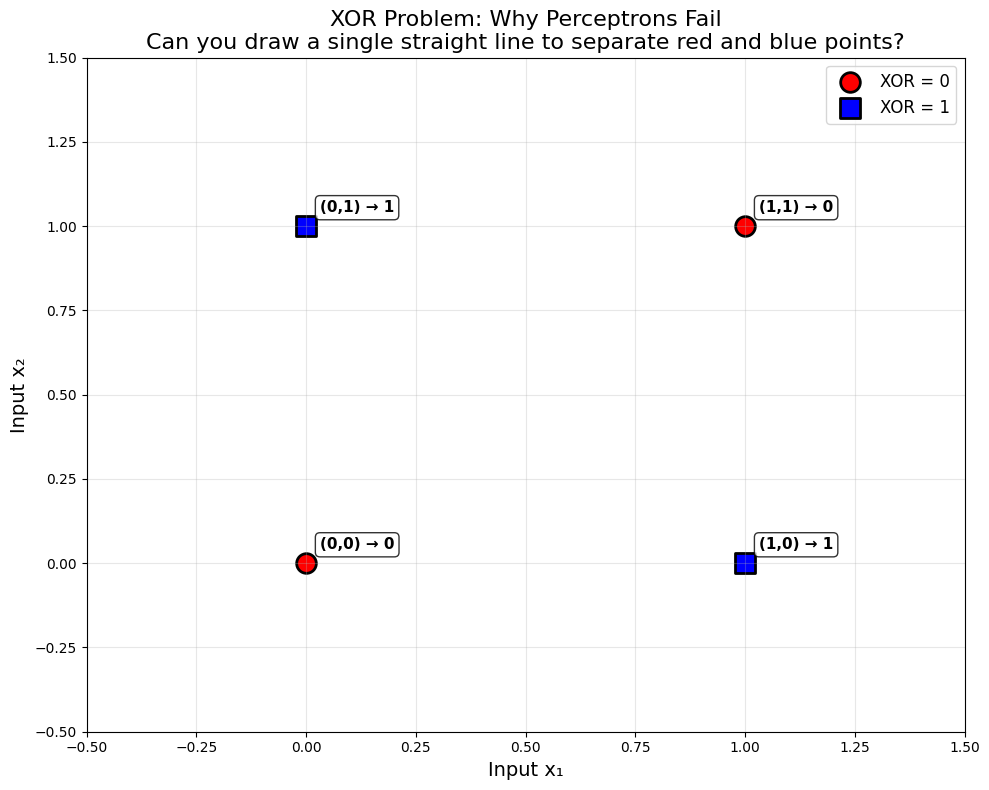

In [33]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Creating the XOR Dataset

def create_xor_dataset():
    """
    Create the classic XOR dataset that demonstrates linear non-separability.
    This is the problem that historically showed perceptron limitations.
    """
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])

    return X, y

# Create the XOR dataset
X_xor, y_xor = create_xor_dataset()
print("XOR Dataset - The Classic Non-Linearly Separable Problem:")
print("Inputs (X):")
print(X_xor)
print("Outputs (y):")
print(y_xor)
print("\nNotice: Points (0,1) and (1,0) have output 1, while (0,0) and (1,1) have output 0")
print("No single straight line can separate these two classes!")


## Part 2: Visualizing the Non-Linear Separability Problem

def plot_xor_data(X, y):
    """
    Visualize the XOR problem to show why it's non-linearly separable.
    This plot clearly shows the geometric impossibility for a perceptron.
    """
    plt.figure(figsize=(10, 8))
    class_0_mask = (y == 0)
    class_1_mask = (y == 1)
    plt.scatter(X[class_0_mask, 0], X[class_0_mask, 1], c='red', marker='o', s=200, label='XOR = 0', edgecolor='black', linewidth=2)
    plt.scatter(X[class_1_mask, 0], X[class_1_mask, 1], c='blue', marker='s', s=200, label='XOR = 1', edgecolor='black', linewidth=2)

    plt.xlabel('Input x₁', fontsize=14)
    plt.ylabel('Input x₂', fontsize=14)
    plt.title('XOR Problem: Why Perceptrons Fail\nCan you draw a single straight line to separate red and blue points?', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)

    # Add text annotations for each point showing the XOR computation

    for i in range(len(X)):
        plt.annotate(f'({X[i,0]},{X[i,1]}) → {y[i]}',
                    (X[i,0], X[i,1]),
                    xytext=(10, 10), textcoords='offset points',
                    fontsize=11, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

    plt.tight_layout()
    plt.show()

plot_xor_data(X_xor, y_xor)

In [42]:
torch.rand(10) * .01

tensor([0.0085, 0.0059, 0.0064, 0.0098, 0.0027, 0.0066, 0.0028, 0.0086, 0.0090,
        0.0004])

In [47]:
## Part 3: Implementing a Perceptron from Scratch

class SimplePerceptron:
    """
    A simple perceptron implementation to demonstrate the linear threshold mechanism.
    This follows the classic perceptron learning algorithm from our lectures.
    """
    def __init__(self, learning_rate=0.1, max_epochs=1000):
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.weights = None
        self.bias = None
        self.training_errors = []

    def _activation_function(self, z):
        """Step function: returns 1 if z >= 0, else 0"""
        return np.where(z >= 0, 1, 0)

    def fit(self, X, y):
        """
        Train the perceptron using the classic perceptron learning rule:
        w = w + η(target - prediction) * input
        """
        n_points, n_features = X.shape

        # TODO: Initialize weights randomly and bias to zero
        self.weights = torch.rand(n_features) * .01
        self.bias = 0

        # Training loop - implement the perceptron learning algorithm
        for epoch in range(self.max_epochs):
            # Number of wrong predictions in current epoch
            errors = 0

            for i in range(n_points):
                # TODO: Compute the linear combination (net input)
                linear_output = np.dot(X[i], self.weights) + self.bias 

                # Apply step function to get prediction
                prediction = self._activation_function(linear_output)

                # TODO: Calculate the error and update rule
                error = y[i] - prediction

                # Only update weights if there's an error (classic perceptron rule)
                if error != 0:
                    errors += 1

                    # TODO: Apply perceptron update rule
                    self.weights += self.learning_rate * error * X[i]
                    self.bias += self.learning_rate * error

            self.training_errors.append(errors)

            # If no errors in this epoch, we've converged (for linearly separable data)
            if errors == 0:
                print(f"Converged after {epoch + 1} epochs!")
                break
        else:
            print(f"Did not converge after {self.max_epochs} epochs - likely not linearly separable!")

    def predict(self, X):
        """Make predictions using the learned decision boundary"""
        linear_output = np.dot(X, self.weights) + self.bias
        return self._activation_function(linear_output)

    def get_decision_boundary_params(self):
        """
        Get parameters for plotting the decision boundary line.
        Decision boundary: w₁x₁ + w₂x₂ + b = 0
        Rearranged as: x₂ = -(w₁x₁ + b) / w₂
        """
        if len(self.weights) == 2 and self.weights[1] != 0:
            slope = -self.weights[0] / self.weights[1]
            intercept = -self.bias / self.weights[1]
            return slope, intercept
        return None, None

In [48]:
from sklearn.metrics import accuracy_score

## Part 4: Training the Perceptron on XOR and Observing the Failure

print("Training a perceptron on the XOR problem...")
print("Expected result: The perceptron will fail to learn the correct pattern!")
print("-" * 60)

# TODO: Create and train the perceptron
perceptron = SimplePerceptron(learning_rate = 0.1, max_epochs=50)
perceptron.fit(X_xor, y_xor)

# Make predictions and evaluate
predictions = perceptron.predict(X_xor)
accuracy = accuracy_score(y_xor, predictions)

print(f"\nFinal Results:")
print(f"Accuracy: {accuracy:.2f} (Perfect would be 1.00)")
print(f"Final weights: {perceptron.weights}")
print(f"Final bias: {perceptron.bias:.3f}")

print("\nPredictions vs True values:")
print("Input  | True | Predicted | Correct?")
print("-" * 36)
for i in range(len(X_xor)):
    correct = "✓" if predictions[i] == y_xor[i] else "✗"
    print(f"{X_xor[i]}  |  {y_xor[i]}   |     {predictions[i]}     |    {correct}")

Training a perceptron on the XOR problem...
Expected result: The perceptron will fail to learn the correct pattern!
------------------------------------------------------------
Did not converge after 50 epochs - likely not linearly separable!

Final Results:
Accuracy: 0.50 (Perfect would be 1.00)
Final weights: tensor([-0.0908,  0.0043], dtype=torch.float64)
Final bias: 0.000

Predictions vs True values:
Input  | True | Predicted | Correct?
------------------------------------
[0 0]  |  0   |     1     |    ✗
[0 1]  |  1   |     1     |    ✓
[1 0]  |  1   |     0     |    ✗
[1 1]  |  0   |     0     |    ✓


/tmp/ipykernel_443606/3789578081.py:37: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  linear_output = np.dot(X[i], self.weights) + self.bias
/tmp/ipykernel_443606/3789578081.py:50: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  self.weights += self.learning_rate * error * X[i]
/tmp/ipykernel_443606/3789578081.py:64: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  linear_output = np.dot(

/tmp/ipykernel_443606/1000282461.py:23: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  y_line = slope * x_line + intercept
/tmp/ipykernel_443606/3789578081.py:64: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  linear_output = np.dot(X, self.weights) + self.bias


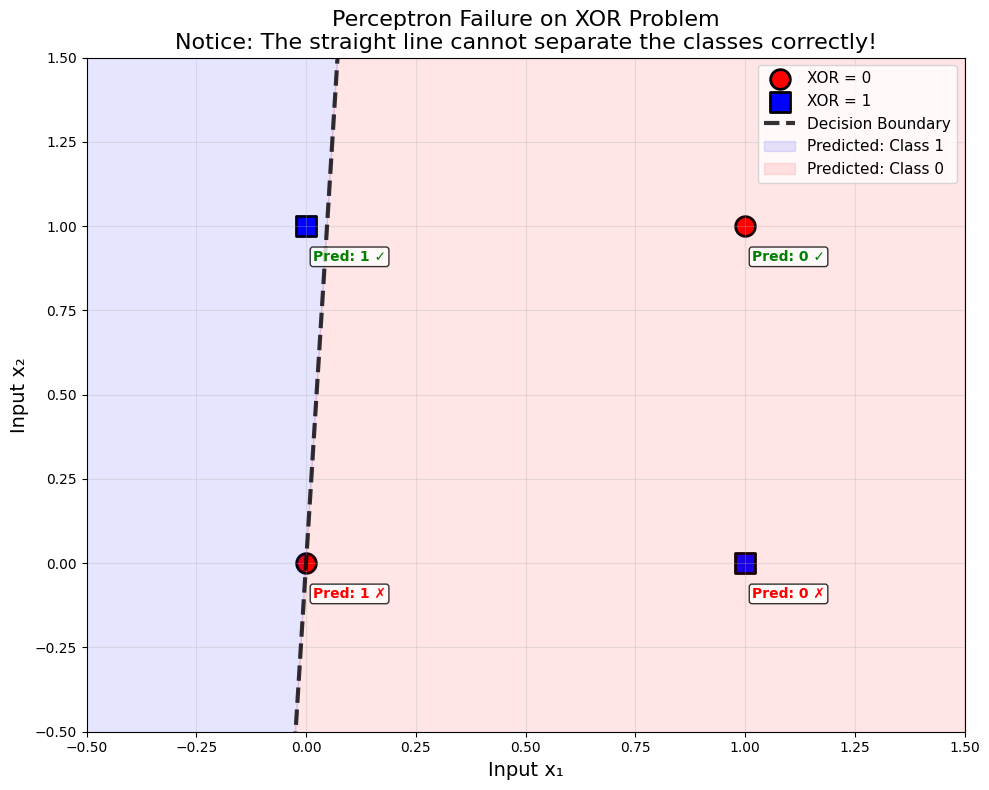

In [49]:
## Part 5: Visualizing the Decision Boundary and the Failure

def plot_perceptron_decision_boundary(X, y, perceptron, title="Perceptron Decision Boundary"):
    """
    Plot the data points and the linear decision boundary learned by the perceptron.
    This visualization clearly shows why the linear boundary fails on XOR.
    """
    plt.figure(figsize=(10, 8))

    # Plot the data points
    class_0_mask = (y == 0)
    class_1_mask = (y == 1)
    plt.scatter(X[class_0_mask, 0], X[class_0_mask, 1], c='red', marker='o', s=200,
                label='XOR = 0', edgecolor='black', linewidth=2)
    plt.scatter(X[class_1_mask, 0], X[class_1_mask, 1], c='blue', marker='s', s=200,
                label='XOR = 1', edgecolor='black', linewidth=2)

    # TODO: Plot the decision boundary
    slope, intercept = perceptron.get_decision_boundary_params()

    if slope is not None:
        x_line = np.linspace(-0.5, 1.5, 100)
        y_line = slope * x_line + intercept
        plt.plot(x_line, y_line, 'k--', linewidth=3, label='Decision Boundary', alpha=0.8)

        # Show which side is which
        plt.fill_between(x_line, y_line, 2, alpha=0.1, color='blue', label='Predicted: Class 1')
        plt.fill_between(x_line, y_line, -1, alpha=0.1, color='red', label='Predicted: Class 0')

    # Show predictions as text annotations
    predictions = perceptron.predict(X)
    for i in range(len(X)):
        color = 'green' if predictions[i] == y[i] else 'red'
        marker = '✓' if predictions[i] == y[i] else '✗'
        plt.annotate(f'Pred: {predictions[i]} {marker}',
                    (X[i,0], X[i,1]),
                    xytext=(5, -25), textcoords='offset points',
                    color=color, fontweight='bold', fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))

    plt.xlabel('Input x₁', fontsize=14)
    plt.ylabel('Input x₂', fontsize=14)
    plt.title(title + '\nNotice: The straight line cannot separate the classes correctly!', fontsize=16)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.tight_layout()
    plt.show()

plot_perceptron_decision_boundary(X_xor, y_xor, perceptron,
                                 "Perceptron Failure on XOR Problem")

In [50]:
X_xor

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [51]:
## Part 6: The Solution - Non-Linear Feature Engineering

def create_nonlinear_features(X):
    """
    Transform the XOR problem into a linearly separable one by adding non-linear features.
    This is the key insight: we need to transform the problem space!
    """
    # TODO: Add non-linear features to make XOR linearly separable
    # One approach: add x₁ XOR x₂ directly (but that's cheating!)
    # Another approach: add the product x₁ * x₂ as a new feature
    # Let's add the product feature: X_enhanced = [x₁, x₂, x₁*x₂]

    X_enhanced = np.column_stack([X, X[:,0] * X[:,1]])

    return X_enhanced

# Create enhanced features
X_enhanced = create_nonlinear_features(X_xor)

print("Original XOR problem:")
print("Inputs (x₁, x₂):")
print(X_xor)
print("\nEnhanced with non-linear features:")
print("Inputs (x₁, x₂, x₁*x₂):")
print(X_enhanced)
print("\nOutputs:", y_xor)

print("\nKey insight: In the enhanced space, the problem becomes linearly separable!")
print("Notice how the x₁*x₂ feature helps distinguish the classes:")
for i in range(len(X_enhanced)):
    print(f"Point {X_enhanced[i]} → class {y_xor[i]}")

Original XOR problem:
Inputs (x₁, x₂):
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

Enhanced with non-linear features:
Inputs (x₁, x₂, x₁*x₂):
[[0 0 0]
 [0 1 0]
 [1 0 0]
 [1 1 1]]

Outputs: [0 1 1 0]

Key insight: In the enhanced space, the problem becomes linearly separable!
Notice how the x₁*x₂ feature helps distinguish the classes:
Point [0 0 0] → class 0
Point [0 1 0] → class 1
Point [1 0 0] → class 1
Point [1 1 1] → class 0


In [52]:
from sklearn.linear_model import Perceptron

# Train a perceptron on the enhanced features
print("\nTraining perceptron on enhanced features...")
enhanced_perceptron = Perceptron(random_state=42, max_iter=1000)
enhanced_perceptron.fit(X_enhanced, y_xor)

enhanced_predictions = enhanced_perceptron.predict(X_enhanced)
enhanced_accuracy = accuracy_score(y_xor, enhanced_predictions)

print(f"\nResults with non-linear features:")
print(f"Accuracy: {enhanced_accuracy:.2f} (Perfect!)")
print(f"Weights: {enhanced_perceptron.coef_[0]}")
print(f"Bias: {enhanced_perceptron.intercept_[0]:.3f}")

print("\nPredictions vs True values:")
print("Enhanced Input | True | Predicted | Correct?")
print("-" * 44)
for i in range(len(X_enhanced)):
    correct = "✓" if enhanced_predictions[i] == y_xor[i] else "✗"
    print(f"{X_enhanced[i]}        |  {y_xor[i]}   |     {enhanced_predictions[i]}     |    {correct}")

print(f"\nConclusion: By adding non-linear features, we made XOR linearly separable!")
print("This is exactly what hidden layers in neural networks do automatically!")


Training perceptron on enhanced features...

Results with non-linear features:
Accuracy: 1.00 (Perfect!)
Weights: [ 2.  2. -5.]
Bias: -1.000

Predictions vs True values:
Enhanced Input | True | Predicted | Correct?
--------------------------------------------
[0 0 0]        |  0   |     0     |    ✓
[0 1 0]        |  1   |     1     |    ✓
[1 0 0]        |  1   |     1     |    ✓
[1 1 1]        |  0   |     0     |    ✓

Conclusion: By adding non-linear features, we made XOR linearly separable!
This is exactly what hidden layers in neural networks do automatically!
